In [1]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 29.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 41.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install mlflow --user


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 64.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.8/538.8 kB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [1]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA

## Importing the Dataset

In [43]:
df=pd.read_csv('sampled_final_df.csv')
df_train=df.drop("isFraud",axis=1)
output_col=pd.DataFrame(df['isFraud'])

## Cleaning the dataset

In [44]:
df_train['CASH_IN']=df_train['CASH_IN'].map({True:1,False:0})
df_train['CASH_OUT']=df_train['CASH_OUT'].map({True:1,False:0})
df_train['DEBIT']=df_train['DEBIT'].map({True:1,False:0})
df_train['PAYMENT']=df_train['PAYMENT'].map({True:1,False:0})
df_train['TRANSFER']=df_train['TRANSFER'].map({True:1,False:0})


In [45]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [46]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [47]:
df_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,18417.240320,0.00,1.240395e+04,1.551259e+04,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,346354.615847,0.00,0.000000e+00,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,6049.000000,0.00,2.497772e+04,3.165680e+05,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,66777.824054,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,351115,1371643
4,379,678.130000,45082.000000,44403.87,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,717917.637444,0.00,1.174964e+07,1.246756e+07,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,792.000000,489.54,0.000000e+00,0.000000e+00,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,10303.000000,0.00,0.000000e+00,0.000000e+00,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,264334.474702,0.00,0.000000e+00,0.000000e+00,0,0,0,0,0,1,422565,1356128


In [48]:
df_train.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN               int64
CASH_OUT              int64
DEBIT                 int64
PAYMENT               int64
TRANSFER              int64
nameDest_encoded      int64
nameOrig_encoded      int64
dtype: object

In [49]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
max,742.000000,5.072328e+07,3.187613e+07,3.205108e+07,2.355353e+08,2.358797e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.721968e+06,6.352414e+06


In [50]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns


## Exploratory Data Analysis


### 1. First step is to see the type of columns so that we could conclude that even now some columns needs to be appropriated.


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50829 entries, 0 to 50828
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              50829 non-null  int64  
 1   amount            50829 non-null  float64
 2   oldbalanceOrg     50829 non-null  float64
 3   newbalanceOrig    50829 non-null  float64
 4   oldbalanceDest    50829 non-null  float64
 5   newbalanceDest    50829 non-null  float64
 6   isFlaggedFraud    50829 non-null  int64  
 7   CASH_IN           50829 non-null  int64  
 8   CASH_OUT          50829 non-null  int64  
 9   DEBIT             50829 non-null  int64  
 10  PAYMENT           50829 non-null  int64  
 11  TRANSFER          50829 non-null  int64  
 12  nameDest_encoded  50829 non-null  int64  
 13  nameOrig_encoded  50829 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.4 MB


### 2. NULL Values . First step is to see the Null Values


In [52]:
df_train.isnull().sum()

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFlaggedFraud      0
CASH_IN             0
CASH_OUT            0
DEBIT               0
PAYMENT             0
TRANSFER            0
nameDest_encoded    0
nameOrig_encoded    0
dtype: int64

<Axes: >

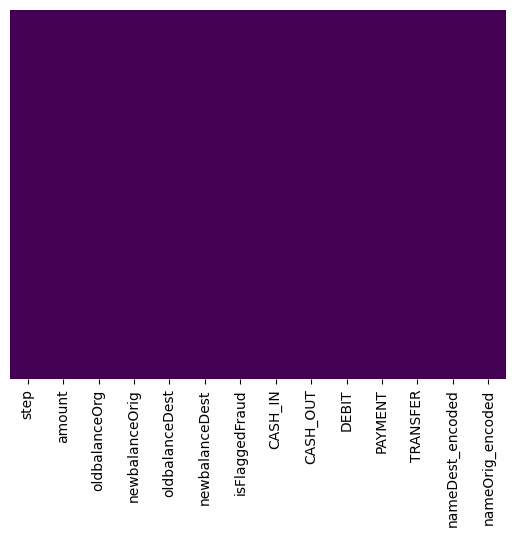

In [53]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### 3. Next step is to see the collinearity. We will use the spearman correlation since even if the dataset is spreaded we can see the correlation very easily. We will also use the Variable Inflation Factor to see the that whether a independent column could be predicted using other independednt columns

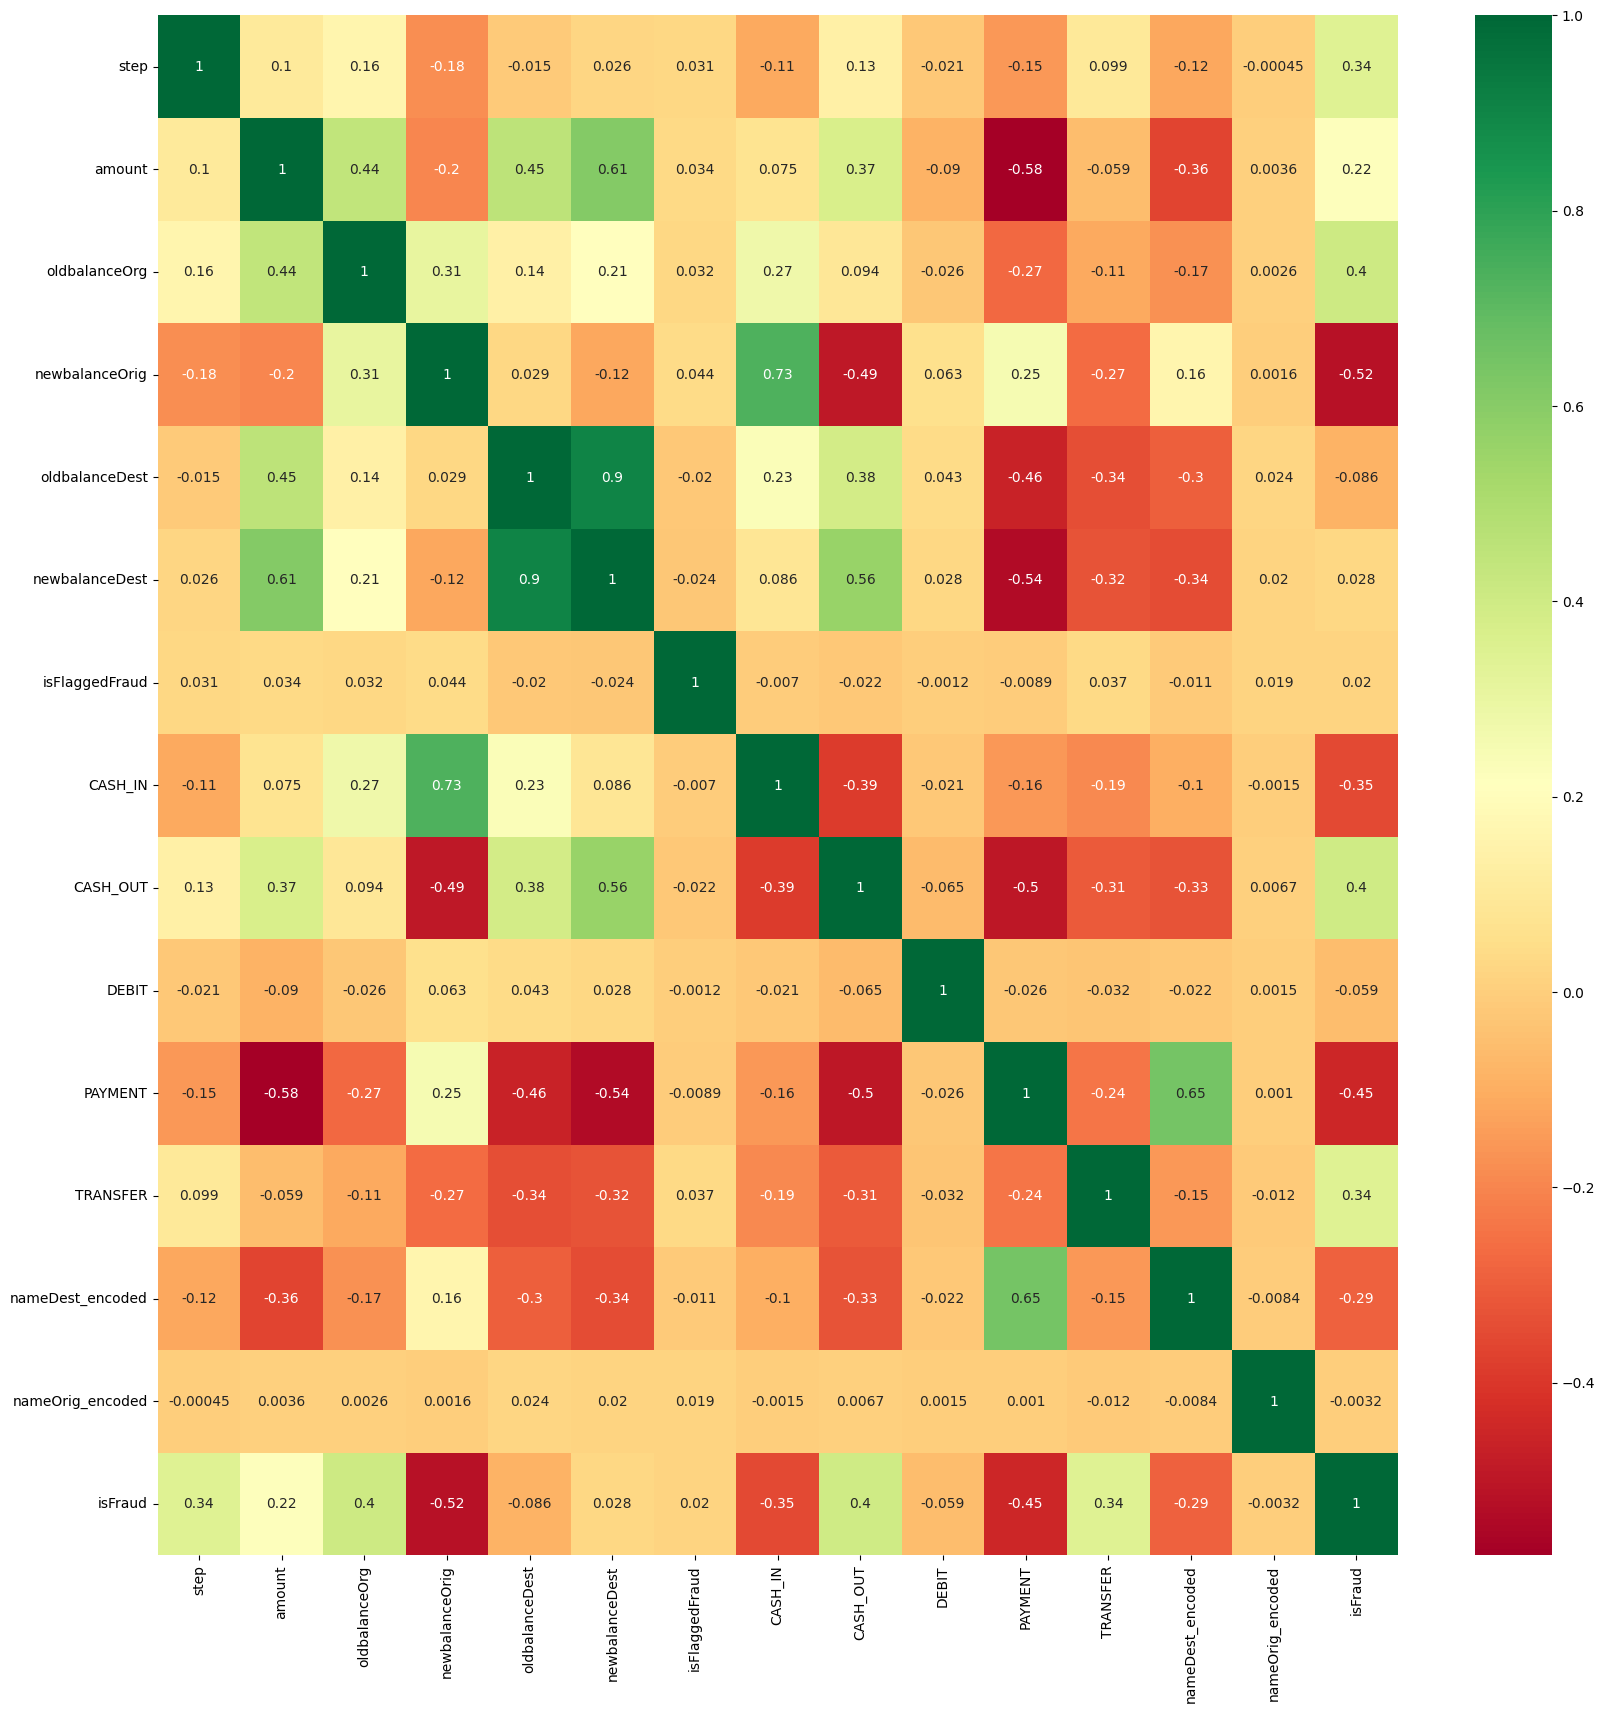

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [55]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
calc_vif(X)

,Variables,VIF
0,step,3.983052
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
6,isFlaggedFraud,1.076938
7,CASH_IN,2.283259
8,CASH_OUT,3.867847
9,DEBIT,1.016719


### 4. Next step is to see the outliers.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

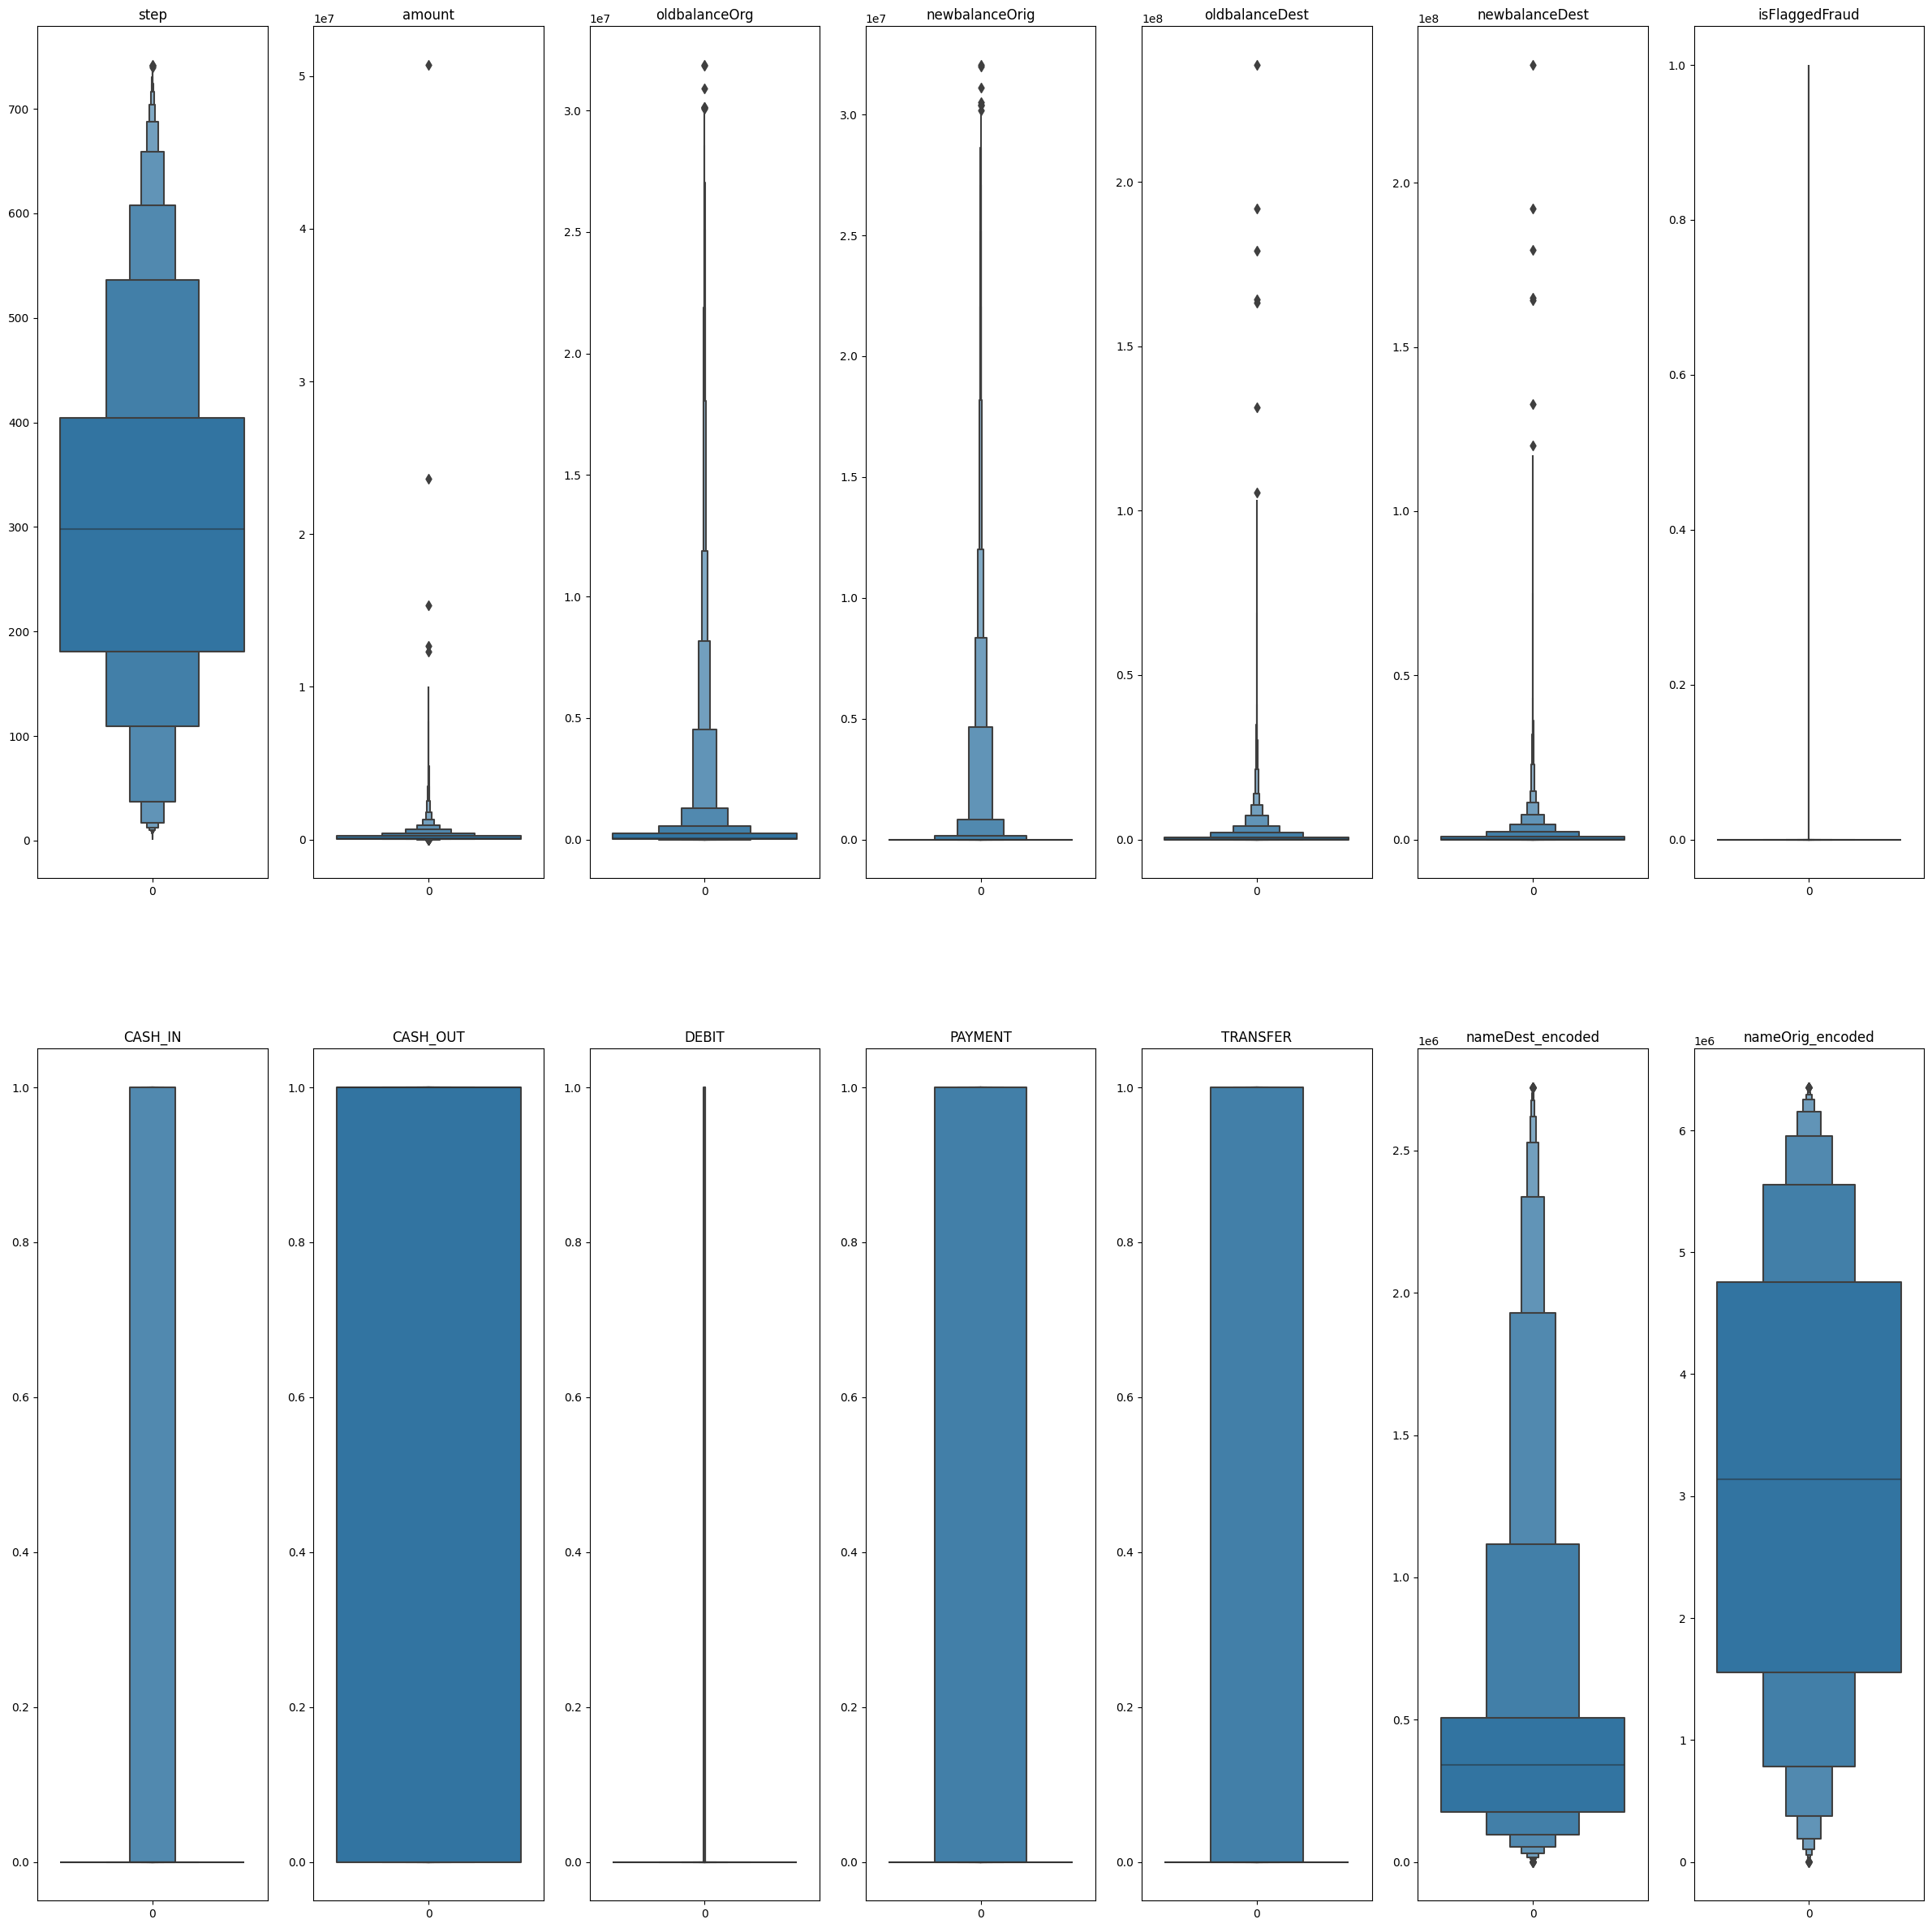

In [56]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

### 5. Next step is to see the density


In [57]:
range(len(df_train))


range(0, 50829)

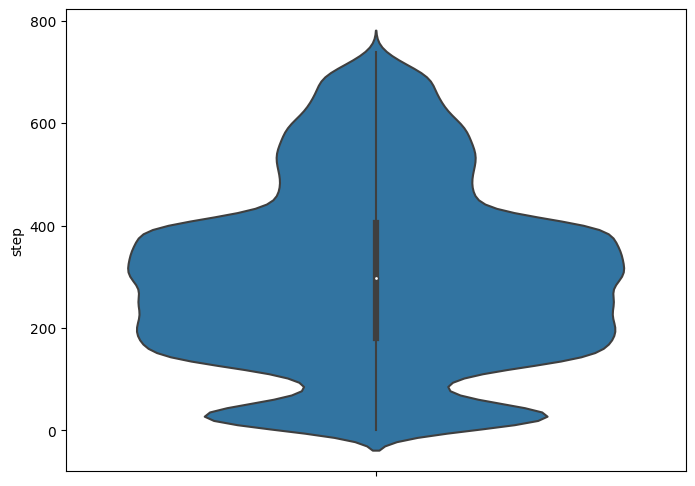

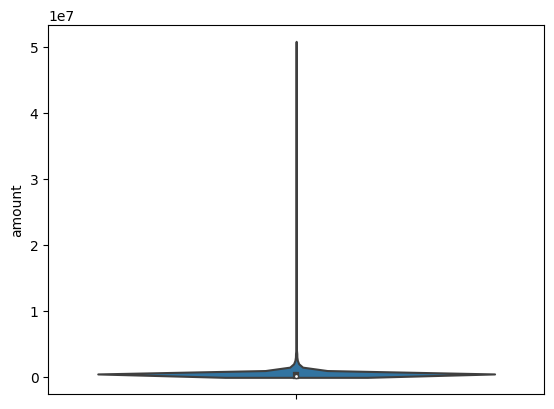

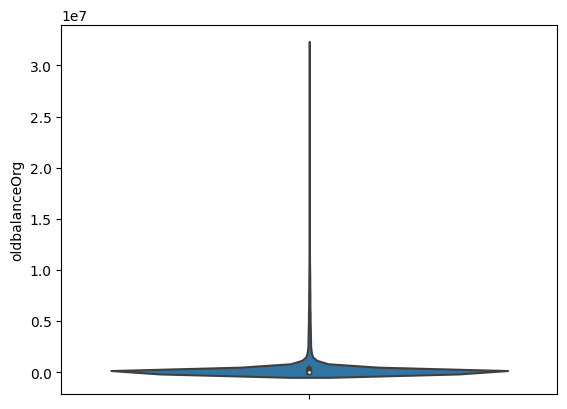

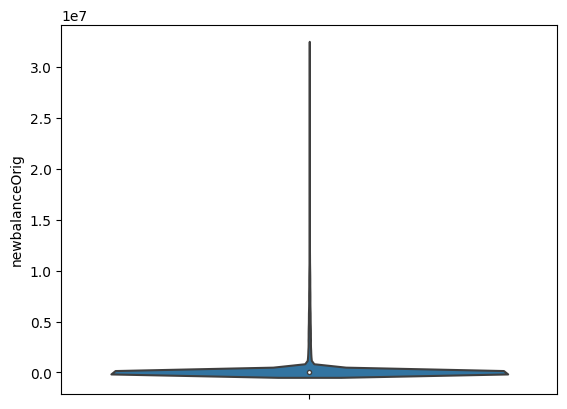

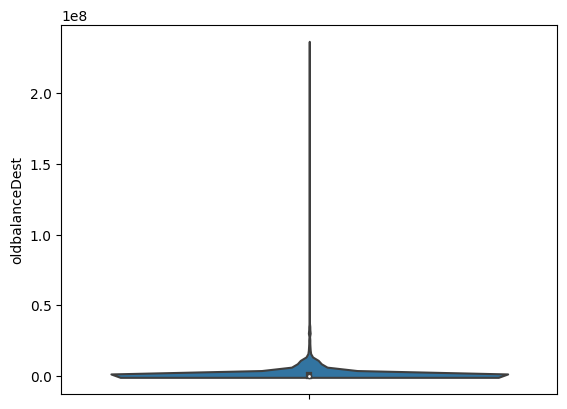

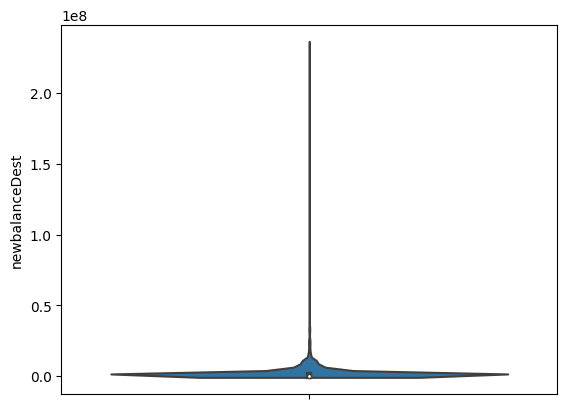

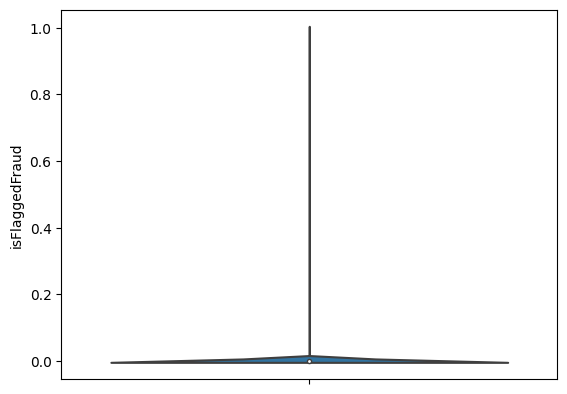

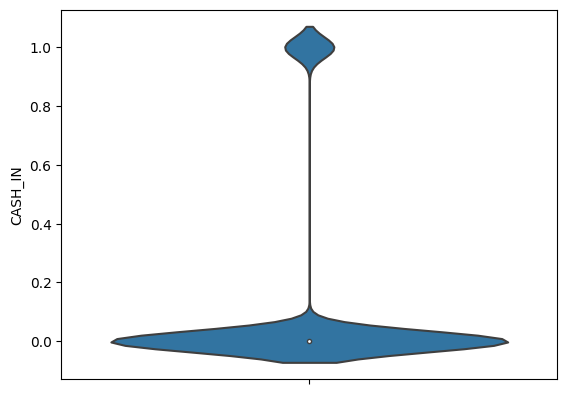

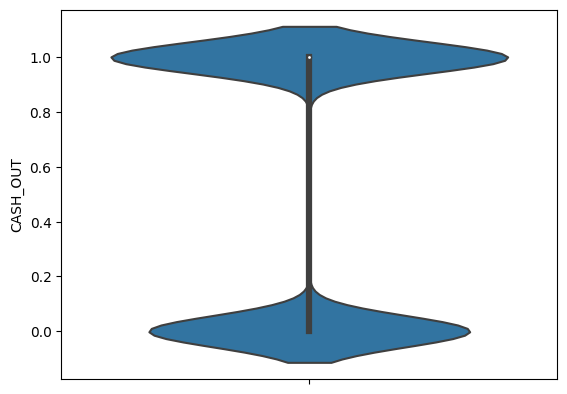

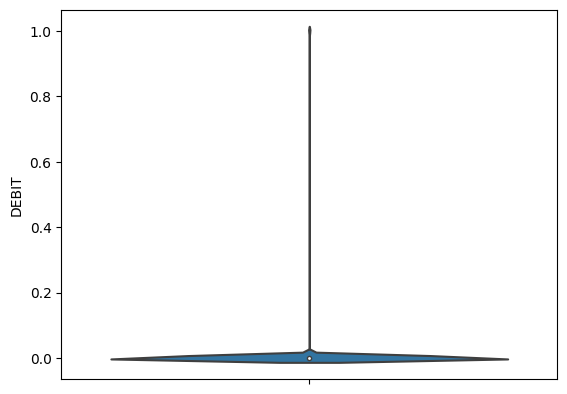

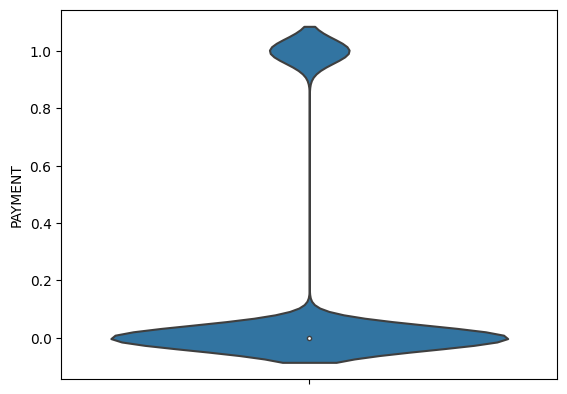

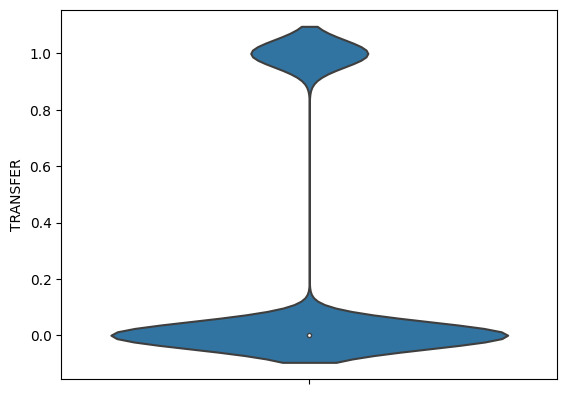

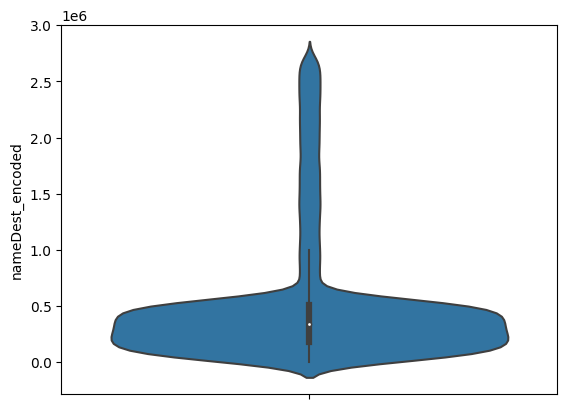

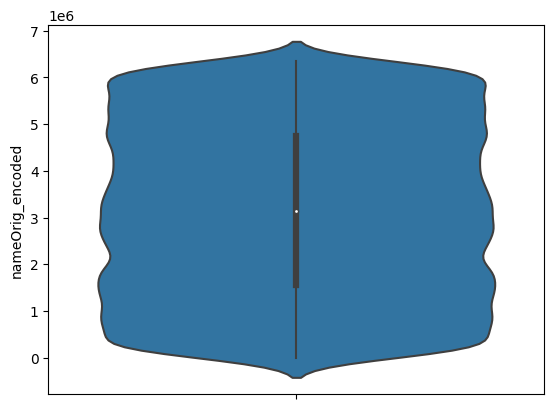

In [58]:
l=[]
for i in range(len(df_train)):
    l.append(i)
# Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()

### 6. Next step is to see the distribution plot


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_539/333339834.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


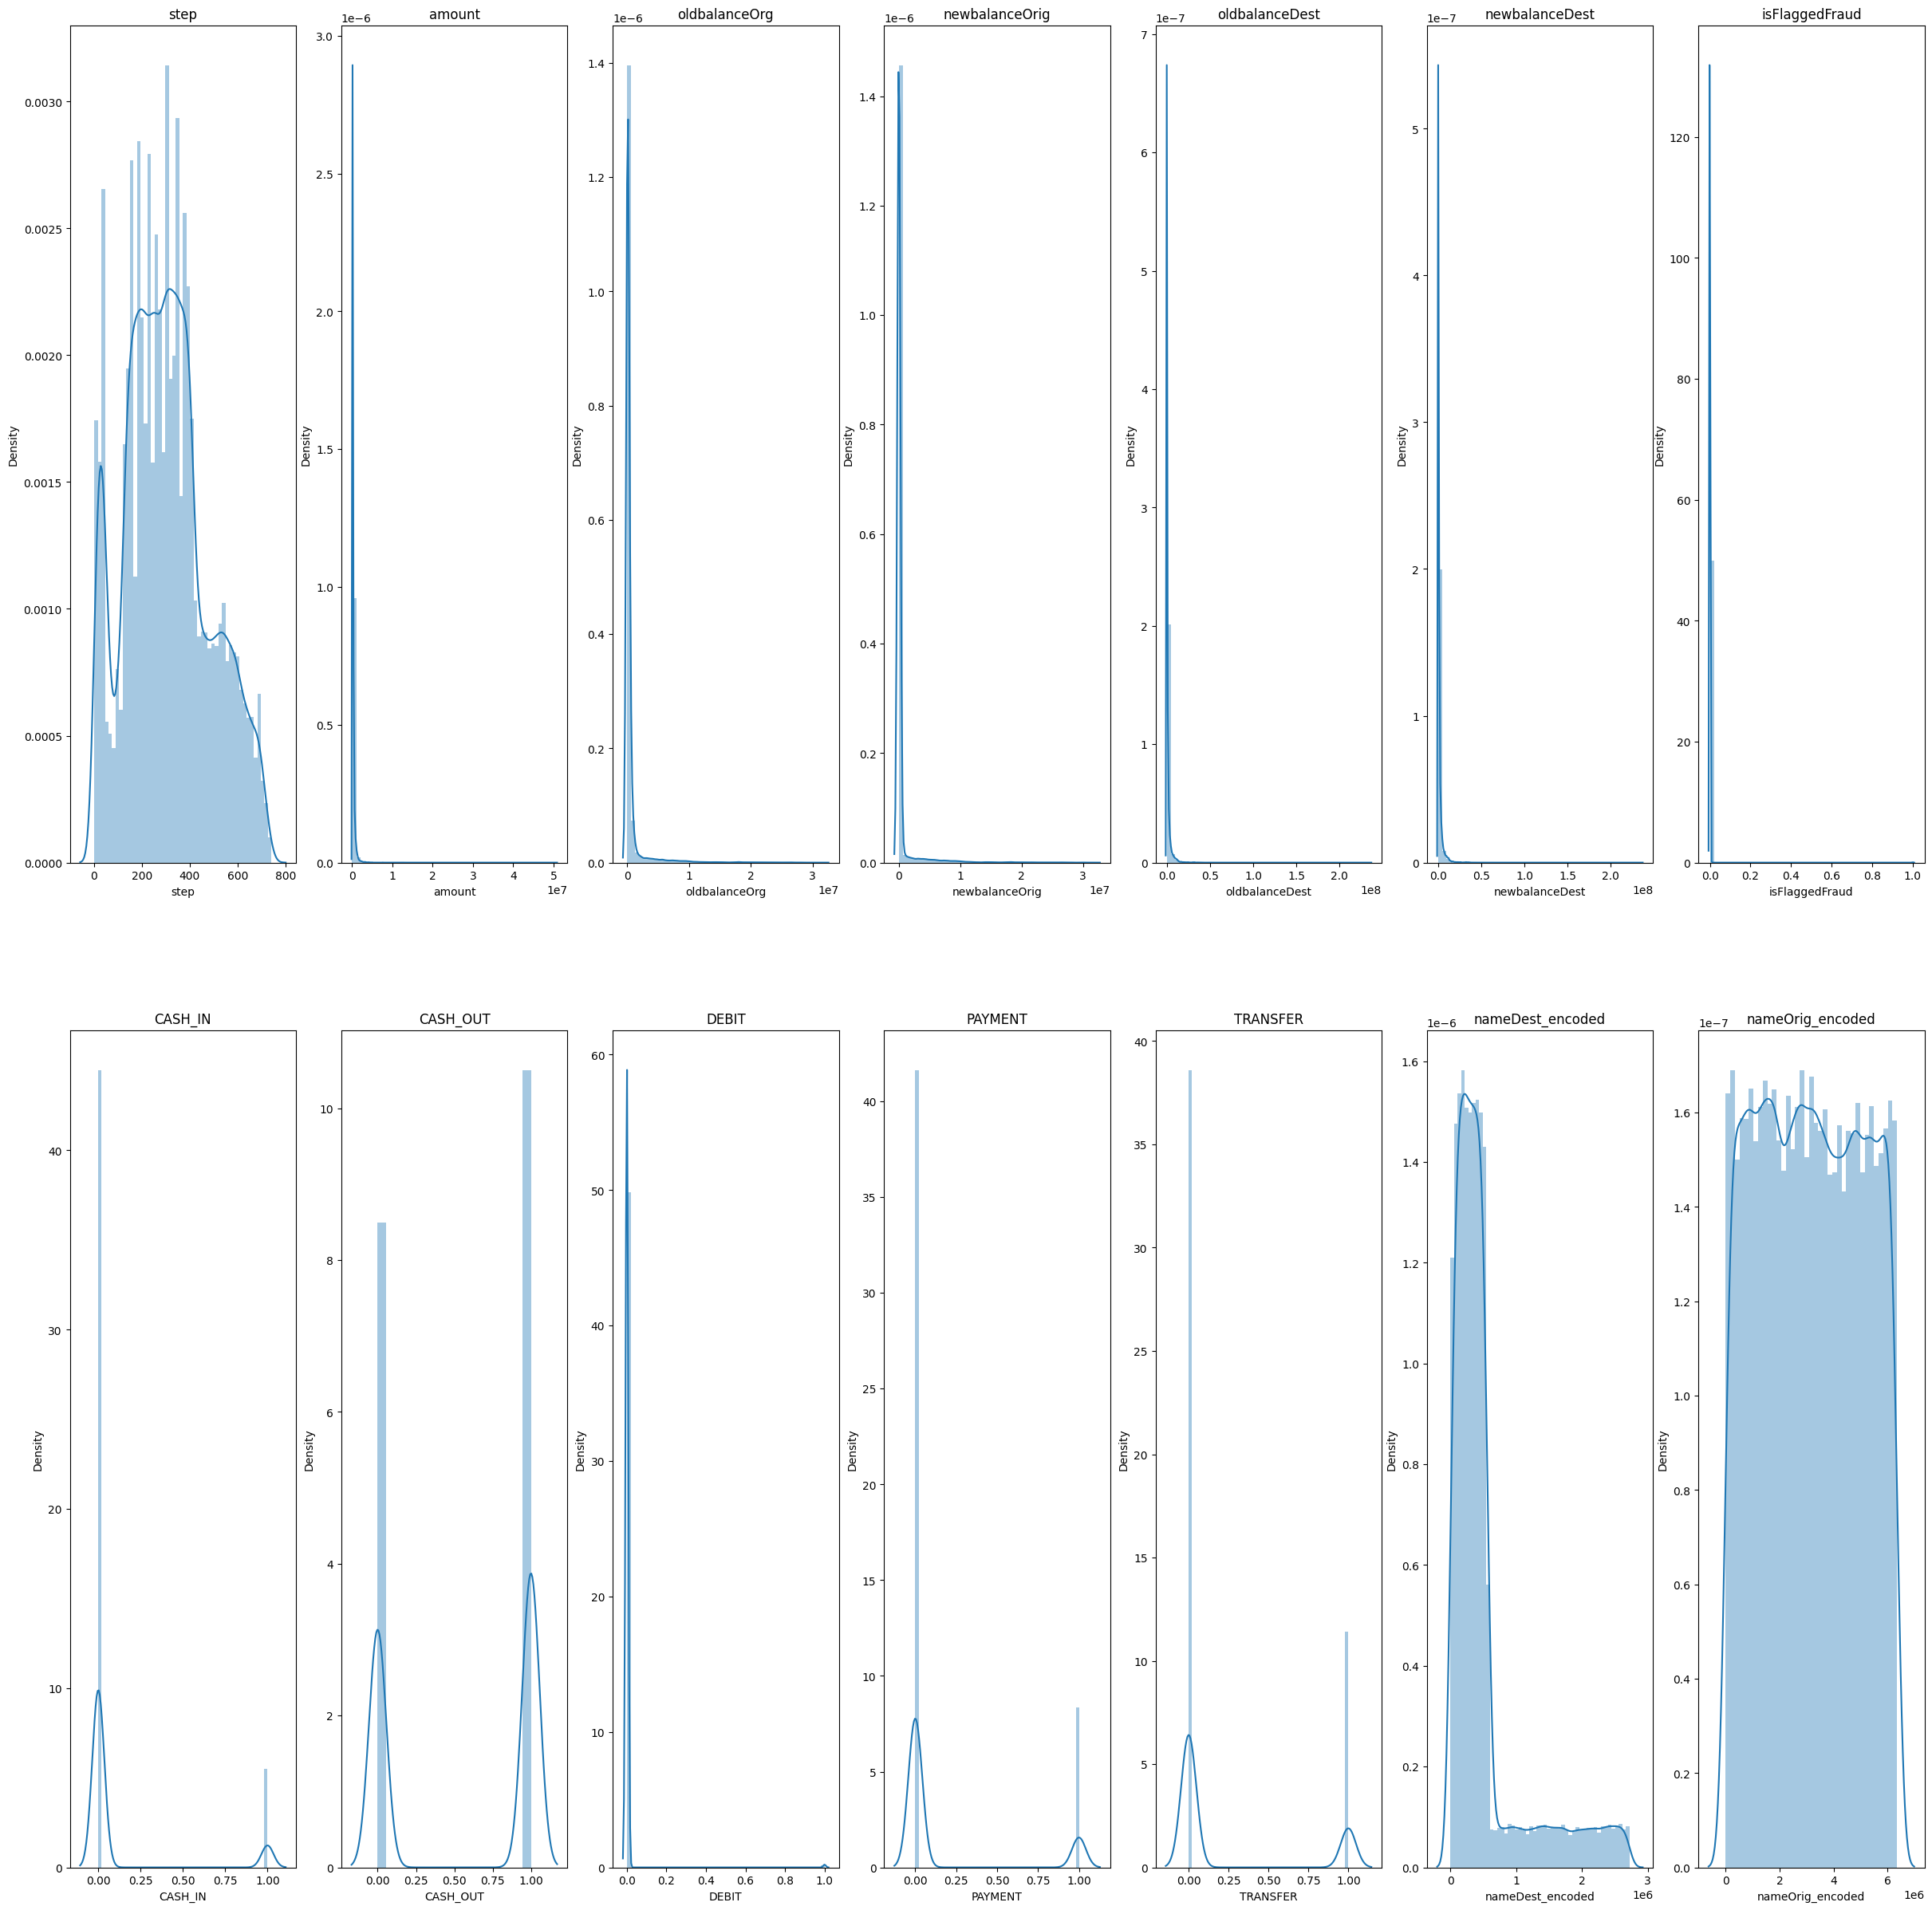

In [59]:
fig, axes = plt.subplots(nrows = 2, ncols = 7)   
axes = axes.flatten()        
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

### 7. To get more clearity we also see the skewness in each of the numerical column


In [60]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 0.32907522436242387 in step
 32.68553090442 in amount
 7.542635502157765 in oldbalanceOrg
 7.525789126034026 in newbalanceOrig
 21.596917413135284 in oldbalanceDest
 19.9791308386168 in newbalanceDest
 50.38452366005486 in isFlaggedFraud
 2.4894972397745674 in CASH_IN
 -0.2130123782597912 in CASH_OUT
 16.954994847224686 in DEBIT
 1.7836909258082823 in PAYMENT
 1.2974895402177526 in TRANSFER
 2.181217674317024 in nameDest_encoded
 0.022616014163888646 in nameOrig_encoded


### 8. Next we see the count plot of each category i.e. basically the countplot


In [61]:
df.dtypes

step                  int64
amount              float64
oldbalanceOrg       float64
newbalanceOrig      float64
oldbalanceDest      float64
newbalanceDest      float64
isFlaggedFraud        int64
CASH_IN                bool
CASH_OUT               bool
DEBIT                  bool
PAYMENT                bool
TRANSFER               bool
nameDest_encoded      int64
nameOrig_encoded      int64
isFraud               int64
dtype: object

Text(0.5, 1.0, 'Count of categories in the label')

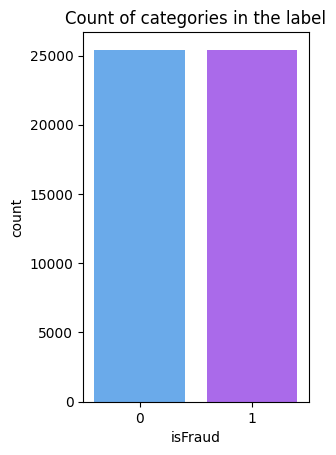

In [62]:
plt.subplot(1,2,1)
sns.countplot(x = 'isFraud' , palette= 'cool', data= output_col) 
plt.title("Count of categories in the label")

### 9. See the redundant values in a column


In [63]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.95,.97,.99])  


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
count,50829.000000,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,5.082900e+04,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,50829.000000,5.082900e+04,5.082900e+04
mean,305.693384,2.129561e+05,5.368273e+05,4.270252e+05,1.019196e+06,1.191137e+06,0.000393,0.110213,0.552952,0.003443,0.167208,0.227882,5.139591e+05,3.150544e+06
std,173.018394,4.760683e+05,2.069521e+06,2.104247e+06,3.522850e+06,3.708267e+06,0.019833,0.313158,0.497193,0.058576,0.373165,0.419470,5.885310e+05,1.838557e+06
min,1.000000,9.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+00,2.600000e+01
25%,181.000000,2.783538e+04,1.048624e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769170e+05,1.555214e+06
50%,298.000000,1.057949e+05,6.282000e+04,0.000000e+00,3.767953e+04,2.428489e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.398270e+05,3.136695e+06
75%,404.000000,2.524101e+05,2.423399e+05,0.000000e+00,7.413421e+05,9.817932e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.056420e+05,4.752738e+06
95%,627.000000,7.440183e+05,2.080911e+06,2.005502e+06,4.880836e+06,5.332377e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.093464e+06,6.044182e+06
97%,660.000000,9.647865e+05,4.753570e+06,4.889036e+06,7.325888e+06,7.746684e+06,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.354664e+06,6.161653e+06
99%,697.000000,1.575369e+06,1.025901e+07,1.044295e+07,1.235383e+07,1.294601e+07,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.597296e+06,6.281850e+06


## Modification on the basis of EDA


### 1. Appropriation 

### 2. NULL values



### 3. Removing the most correlated column


In [64]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
df_vif=calc_vif(X)
df_vif

,Variables,VIF
0,step,3.983052
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
6,isFlaggedFraud,1.076938
7,CASH_IN,2.283259
8,CASH_OUT,3.867847
9,DEBIT,1.016719


In [65]:
df_vif.dtypes

Variables     object
VIF          float64
dtype: object

In [66]:
df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]

,Variables,VIF
1,amount,4.781047
2,oldbalanceOrg,93.099080
3,newbalanceOrig,95.589279
4,oldbalanceDest,115.344272
5,newbalanceDest,128.855338
10,PAYMENT,6.566721
12,nameDest_encoded,6.879791


In [67]:
most_correlated_cols=list(df_vif[(df_vif['VIF'] < 0.25) | (df_vif['VIF'] > 4)]['Variables'].values)
most_correlated_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'PAYMENT',
 'nameDest_encoded']

In [68]:
new_cols=['oldbalanceDest','newbalanceDest','oldbalanceOrg','newbalanceOrig']

In [69]:
df_train.drop(new_cols,axis=1,inplace=True)
df_train

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,18417.240320,0,0,1,0,0,1,209519,2572822
1,419,346354.615847,0,0,1,0,0,0,403995,6311127
2,229,291590.310000,0,0,1,0,0,0,482160,3861560
3,418,66777.824054,0,0,0,0,0,1,351115,1371643
4,379,678.130000,0,0,0,0,1,0,2184529,5689466
...,...,...,...,...,...,...,...,...,...,...
50824,244,717917.637444,0,0,1,0,0,0,370174,4423416
50825,378,302.460000,0,0,0,0,1,0,2151612,1769882
50826,190,11327.270000,0,0,0,0,1,0,1204550,6093817
50827,512,264334.474702,0,0,0,0,0,1,422565,1356128


### 4. Removing the Outliers

In [70]:
df_train.select_dtypes(include=np.number).columns


Index(['step', 'amount', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'nameDest_encoded', 'nameOrig_encoded'],
      dtype='object')

In [71]:
cols=df_train.select_dtypes(include=np.number).columns
for col in cols:
    print(f"Mode in {col} col is:")
    print(df_train[col].mode().values[0])
    print()

Mode in step col is:
307

Mode in amount col is:
10000000.0

Mode in isFlaggedFraud col is:
0

Mode in CASH_IN col is:
0

Mode in CASH_OUT col is:
1

Mode in DEBIT col is:
0

Mode in PAYMENT col is:
0

Mode in TRANSFER col is:
0

Mode in nameDest_encoded col is:
78924

Mode in nameOrig_encoded col is:
47675



In [72]:
cols=df_train.select_dtypes(include=np.number).columns
for col in cols:
    print(f"Median in {col} col is:")
    print(df_train[col].median())
    print()

Median in step col is:
298.0

Median in amount col is:
105794.85

Median in isFlaggedFraud col is:
0.0

Median in CASH_IN col is:
0.0

Median in CASH_OUT col is:
1.0

Median in DEBIT col is:
0.0

Median in PAYMENT col is:
0.0

Median in TRANSFER col is:
0.0

Median in nameDest_encoded col is:
339827.0

Median in nameOrig_encoded col is:
3136695.0



In [73]:
# Outlier imputing by median
cols=df_train.select_dtypes(include=np.number).columns

for col in cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    value=df_train[col].mode().values[0]
    df_train[col] = np.where((df_train[col] < l) | (df_train[col] > h), value, df_train[col])

[ -153.5 , 738.5 ]
[ -309026.734281777 , 589272.2368402507 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ -1.5 , 2.5 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ 0.0 , 0.0 ]
[ -316170.5 , 998729.5 ]
[ -3241072.0 , 9549024.0 ]


In [74]:
df_train  

,step,amount,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_encoded,nameOrig_encoded
0,563,1.841724e+04,0,0,1,0,0,0,209519,2572822
1,419,3.463546e+05,0,0,1,0,0,0,403995,6311127
2,229,2.915903e+05,0,0,1,0,0,0,482160,3861560
3,418,6.677782e+04,0,0,0,0,0,0,351115,1371643
4,379,6.781300e+02,0,0,0,0,0,0,78924,5689466
...,...,...,...,...,...,...,...,...,...,...
50824,244,1.000000e+07,0,0,1,0,0,0,370174,4423416
50825,378,3.024600e+02,0,0,0,0,0,0,78924,1769882
50826,190,1.132727e+04,0,0,0,0,0,0,78924,6093817
50827,512,2.643345e+05,0,0,0,0,0,0,422565,1356128


/tmp/ipykernel_539/2080969979.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_539/2080969979.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

/tmp/ipykernel_539/2080969979.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_539/2080969979.py:8

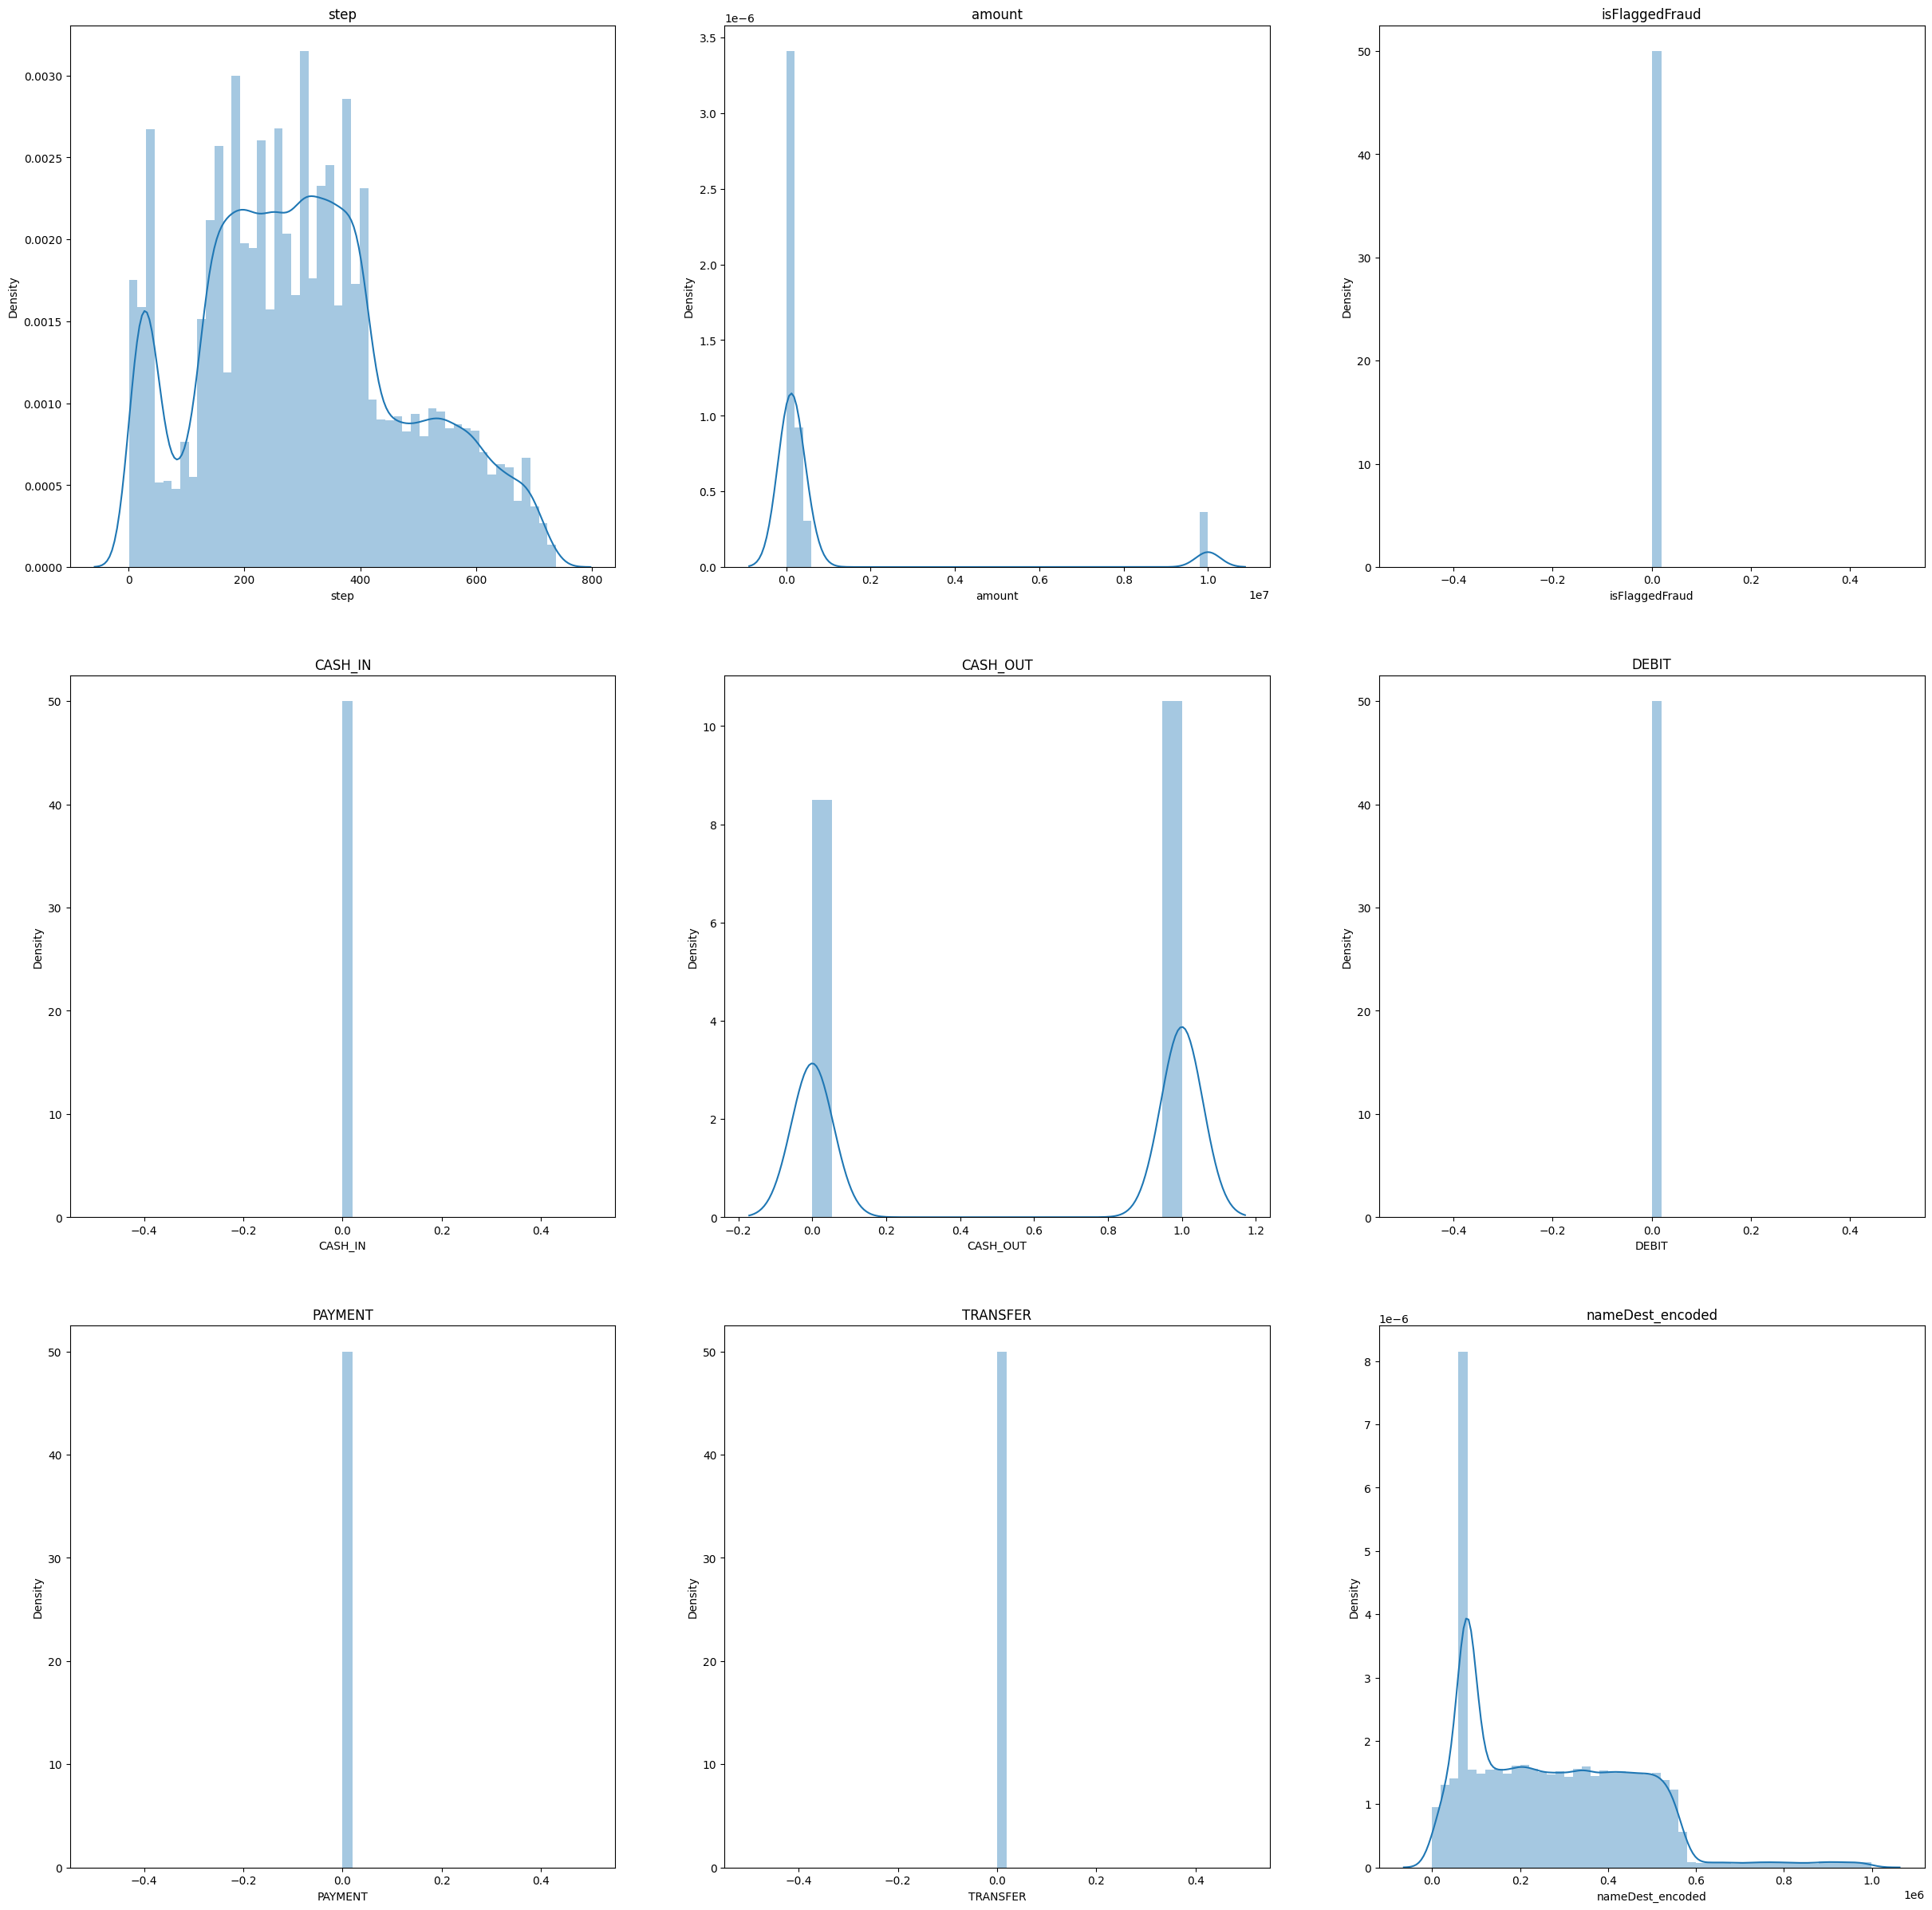

In [75]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

## Encoding

## Making Model


In [76]:
# experiment = mlflow.get_experiment_by_name('PATH3')
# experiment_id = experiment.experiment_id
# mlflow.delete_experiment(experiment_id)

In [78]:
# import mlflow
# experiment_id = mlflow.create_experiment(
#         name="PATH3",
#         tags={"env": "dev", "version": "1.0.0"},
#     )

In [79]:
X=df_train
Y=output_col

In [80]:
    
avg_accuracies=defaultdict(list)
highest_accuracies=defaultdict(list)

algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
for al in algorithms_to_be_tested:
    avg_accuracies[al].append(0)# Accuracy
    avg_accuracies[al].append(0)# Precisoion
    avg_accuracies[al].append(0)# Recall
    avg_accuracies[al].append(0)# fbeta
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))


In [81]:
avg_accuracies

defaultdict(list,
            {'LogisticRegression()': [0, 0, 0, 0],
             'DecisionTreeClassifier()': [0, 0, 0, 0],
             'KNeighborsClassifier()': [0, 0, 0, 0],
             'RandomForestClassifier()': [0, 0, 0, 0],
             'SGDClassifier()': [0, 0, 0, 0],
             'RidgeClassifierCV()': [0, 0, 0, 0],
             'GaussianNB()': [0, 0, 0, 0]})

In [84]:
metrics_history = defaultdict(lambda: defaultdict(list))


In [85]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle,iteration_number):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    
    
    
    scaling=StandardScaler()
    scaling.fit(X)
    Scaled_data=scaling.transform(X)
    principal=PCA(n_components=6)
    principal.fit(Scaled_data)
    X_new=principal.transform(Scaled_data)
    X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X_new, Y, cv=kf).mean()

        
        
        
        
        
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    metrics_history[algo]['accuracy'].append(accuracy)
    metrics_history[algo]['precision'].append(precision[1])
    metrics_history[algo]['recall'].append(recall[1])
    metrics_history[algo]['fbeta'].append(fbeta_score[1])
    metrics_history[algo]['cross_val_results'].append(cross_val_results)   
        
    print()  
    print(f"{algo[:-2]}_train_accuracy_iteration_{iteration_number}", model.score(X_train, Y_train))
    mlflow.log_metric(f"{algo[:-2]}_test_accuracy_iteration_{iteration_number}", accuracy)
    mlflow.log_metric(f"{algo[:-2]}_precision_iteration_{iteration_number}", precision[1])
    mlflow.log_metric(f"{algo[:-2]}_recall_iteration_{iteration_number}", recall[1])
    mlflow.log_metric(f"{algo[:-2]}_fbeta_score_iteration_{iteration_number}", fbeta_score[1])
    mlflow.log_metric(f"{algo[:-2]}_cross_validation_iteration_{iteration_number}", cross_val_results)
    
    
    print(f"Training accuracy of {model} at iteration number {iteration_number} is ", model.score(X_train,Y_train))
    print(f"Testing accuracy of {model} at iteration number {iteration_number} is ",accuracy)  
    print(f"Cross validation mean accuracy of {model} at iteration number {iteration_number} is ",cross_val_results)
    cl=classification_report(y_true=Y_test,y_pred=predicted)
    print(cl)
    if accuracy>highest_accuracies[algo][0]:
        
        highest_accuracies[algo][0]=accuracy
        highest_accuracies[algo][1]=precision[1]
        highest_accuracies[algo][2]=recall[1]
        highest_accuracies[algo][2]=fbeta_score[1]

        print(f"New_highest is reached at iteration number {iteration_number} ",'\n',accuracy,precision,recall)
    avg_accuracies[algo][0]+=accuracy
    avg_accuracies[algo][1]+=precision[1]
    avg_accuracies[algo][2]+=recall[1]
    avg_accuracies[algo][2]+=fbeta_score[1]
    print()
    print("--------------------------------------------------------")
    print(f"At Iteration {iteration_number}")
    print(avg_accuracies)
    cm = confusion_matrix(y_true=Y_test, y_pred=predicted, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure object
    disp.plot(ax=ax)  # Plot the confusion matrix on the figure
    plt.show()
    mlflow.log_figure(fig, f"metrics/{algo}_{iteration_number}_confusion_matrix.png")

    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_1 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 1 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 1 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 1 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166

New_highest is reached at iteration number 1  
 0.7114892779854417 [0.7152143  0.70799161] [0.6969517  0.72585061]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854417, 0.7079916078580966, 1.4426604932120408, 0], 'DecisionTreeClassifier()': 

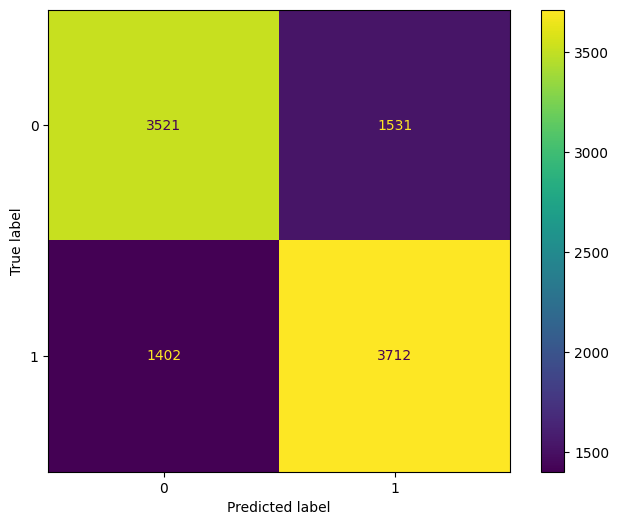

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_2 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 2 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 2 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 2 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [1.4229785559708834, 1.4159832157161931, 2.885320986424082, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

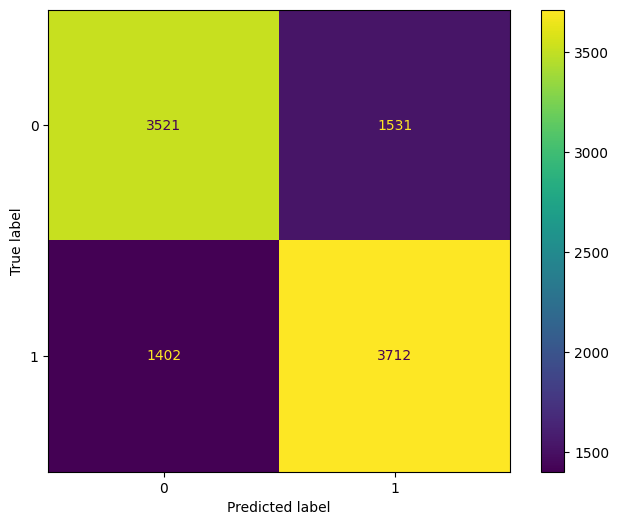

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_3 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 3 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 3 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 3 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [2.1344678339563252, 2.1239748235742897, 4.327981479636123, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

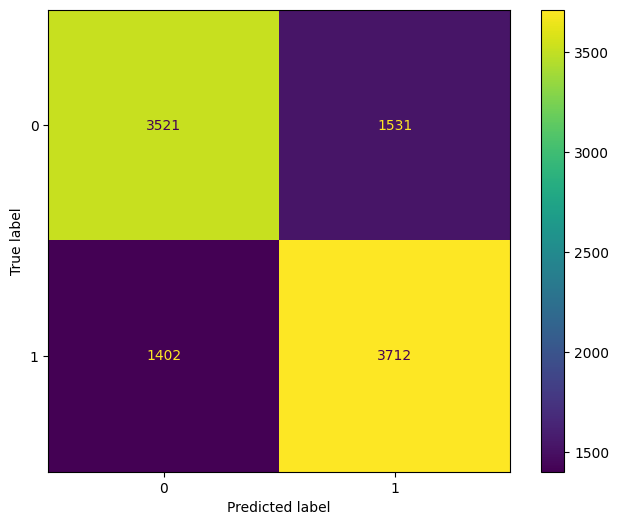

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_4 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 4 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 4 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 4 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [2.845957111941767, 2.8319664314323862, 5.770641972848164, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

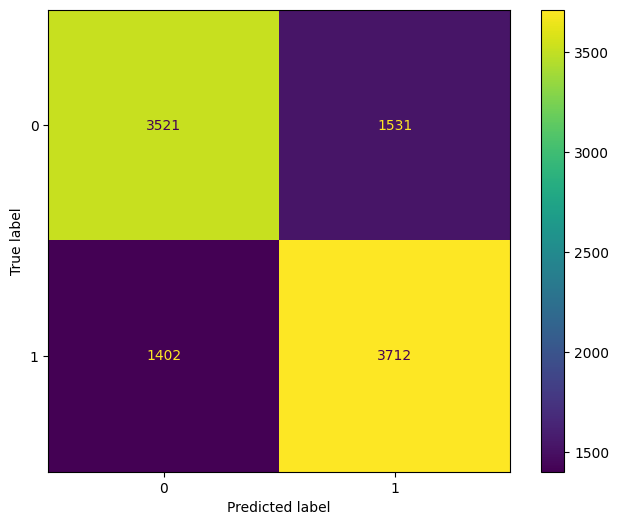

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_5 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 5 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 5 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 5 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [3.5574463899272084, 3.539958039290483, 7.213302466060205, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

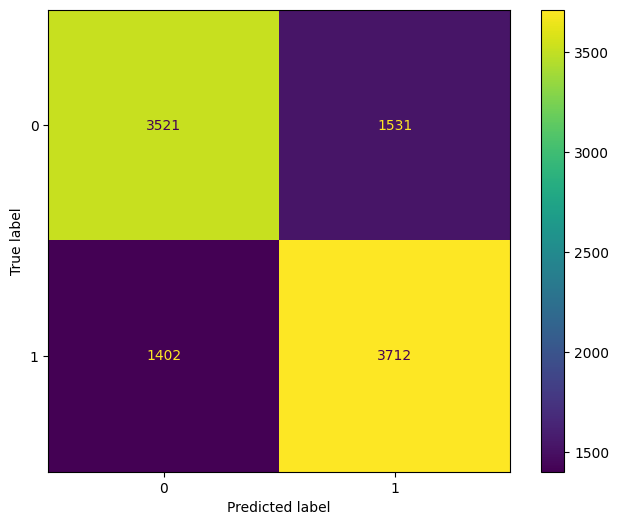

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_6 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 6 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 6 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 6 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [4.2689356679126504, 4.247949647148579, 8.655962959272246, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [0

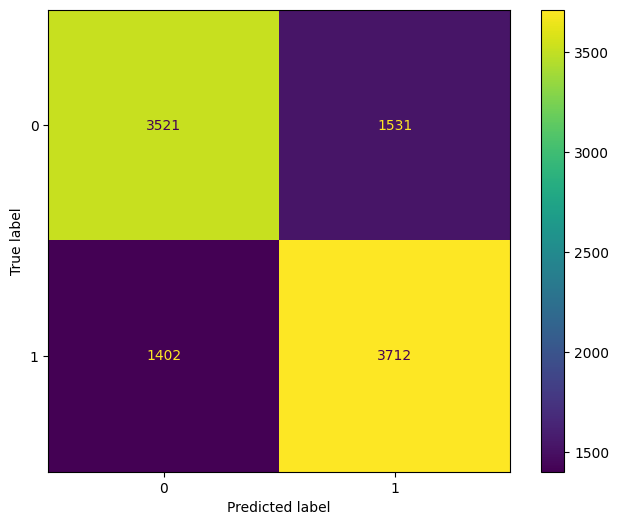

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_7 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 7 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 7 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 7 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [4.9804249458980925, 4.955941255006676, 10.098623452484288, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

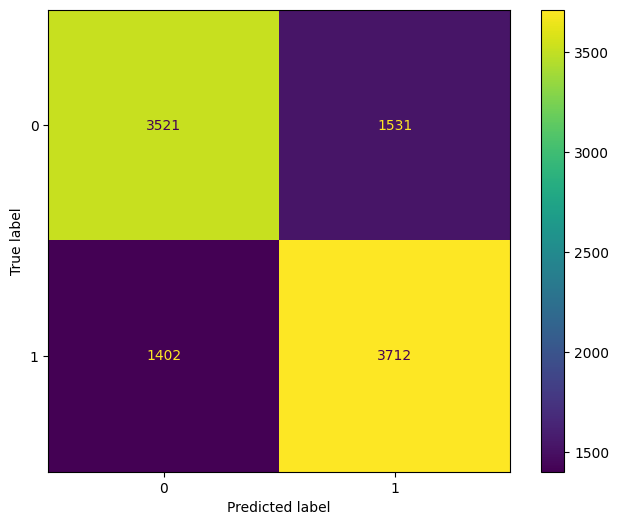

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_8 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 8 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 8 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 8 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [5.6919142238835345, 5.6639328628647725, 11.54128394569633, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

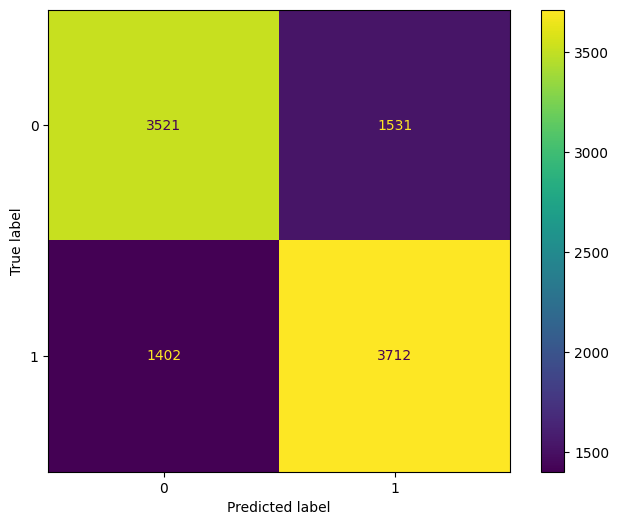

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_9 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 9 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 9 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 9 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [6.4034035018689766, 6.371924470722869, 12.983944438908372, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()': [

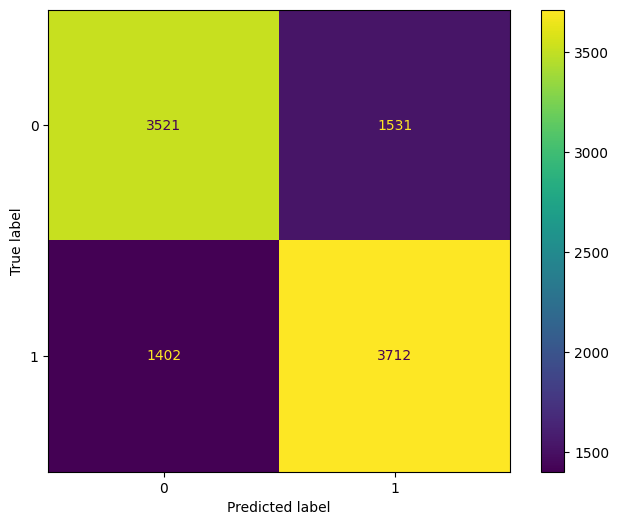

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


LogisticRegression_train_accuracy_iteration_10 0.7110395199567174
Training accuracy of LogisticRegression() at iteration number 10 is  0.7110395199567174
Testing accuracy of LogisticRegression() at iteration number 10 is  0.7114892779854417
Cross validation mean accuracy of LogisticRegression() at iteration number 10 is  0.7113458584545246
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [7.114892779854419, 7.079916078580965, 14.426604932120414, 0], 'DecisionTreeClassifier()': [0, 0, 0, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()': [0, 0, 0, 0], 'SGDClassifier()

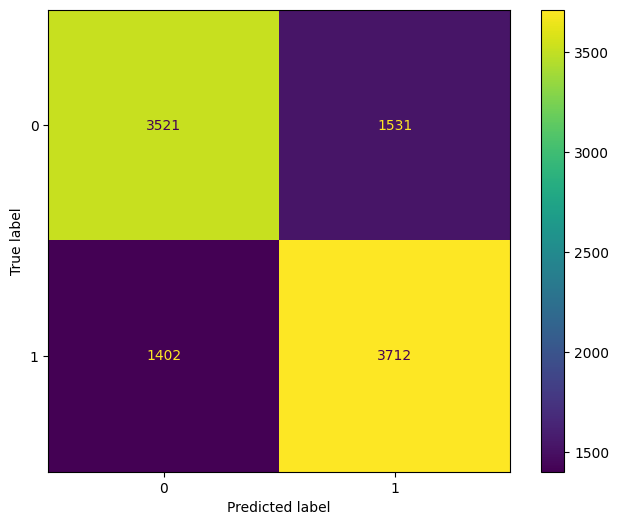


DecisionTreeClassifier_train_accuracy_iteration_1 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 1 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 1 is  0.73106433208735
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 1 is  0.7360563257887586
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166

New_highest is reached at iteration number 1  
 0.73106433208735 [0.72832939 0.73379175] [0.73178939 0.73034806]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7310643320873

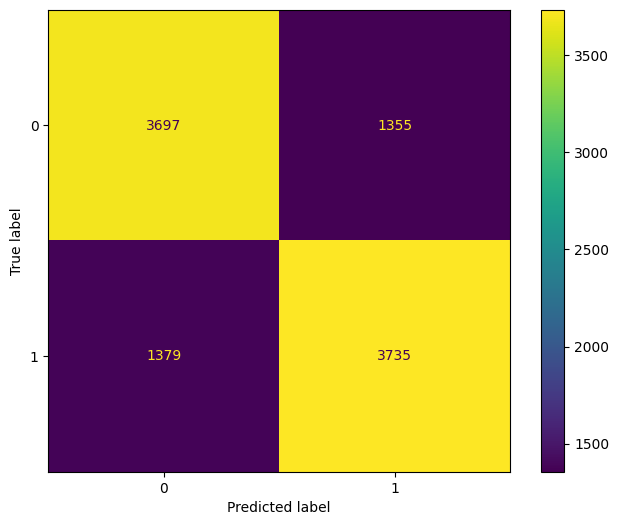


DecisionTreeClassifier_train_accuracy_iteration_2 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 2 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 2 is  0.729195357072595
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 2 is  0.7375318149606837
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [1.4602596891599449, 1.465489491411704, 2.92172917130815, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()'

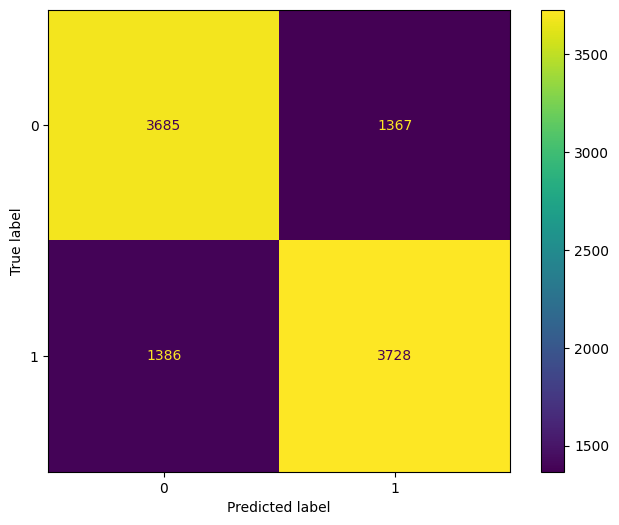


DecisionTreeClassifier_train_accuracy_iteration_3 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 3 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 3 is  0.7308675978752706
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 3 is  0.7379843539690716
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [2.1911272870352154, 2.19963679349914, 4.382262604018799, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()

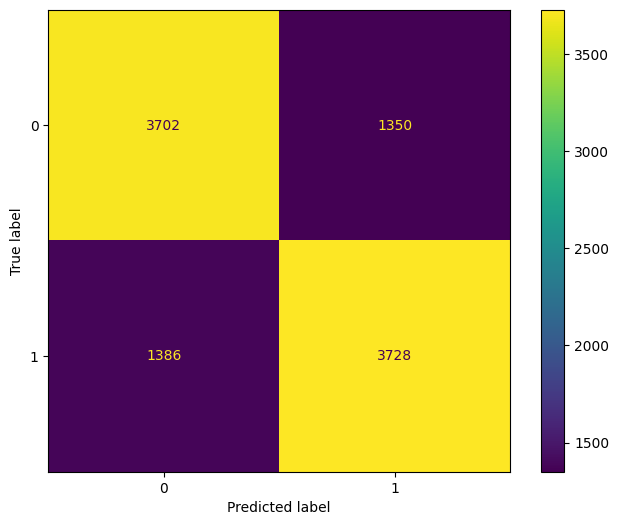


DecisionTreeClassifier_train_accuracy_iteration_4 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 4 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 4 is  0.7281133189061578
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 4 is  0.7383778069099675
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [2.9192406059413734, 2.9301193356725417, 5.839797743688234, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier

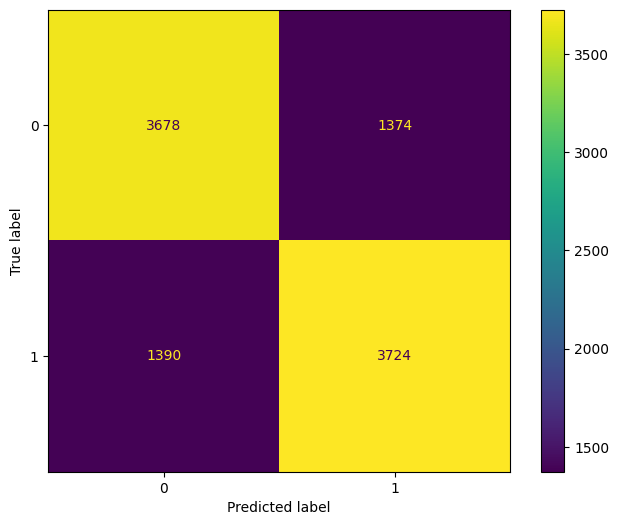


DecisionTreeClassifier_train_accuracy_iteration_5 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 5 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 5 is  0.73106433208735
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 5 is  0.7372957745497539
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [3.6503049380287234, 3.663087229172933, 7.304443346541497, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()'

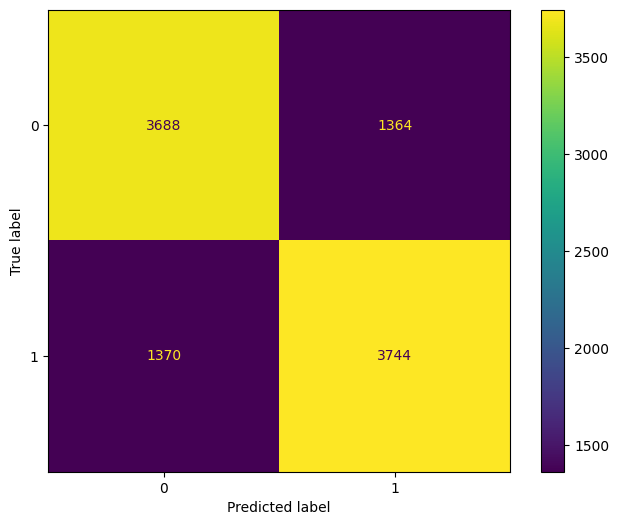


DecisionTreeClassifier_train_accuracy_iteration_6 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 6 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 6 is  0.7292937241786347
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 6 is  0.7361350407630771
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [4.379598662207358, 4.393571226050373, 8.767553243393753, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()

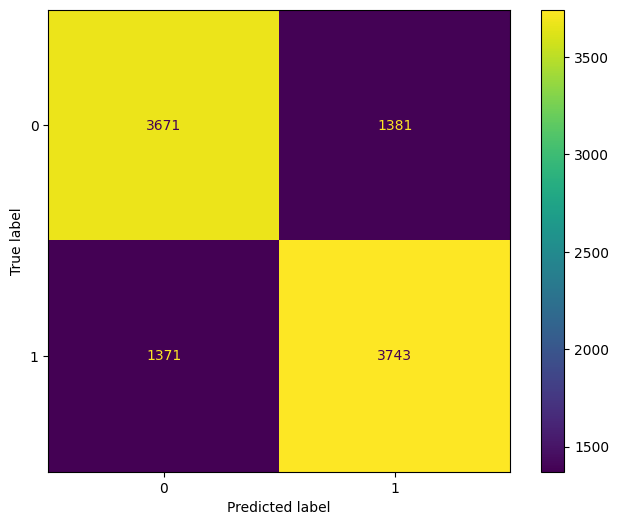


DecisionTreeClassifier_train_accuracy_iteration_7 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 7 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 7 is  0.7303757623450718
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 7 is  0.7365875313862679
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [5.10997442455243, 5.126904559383706, 10.227976219213653, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()

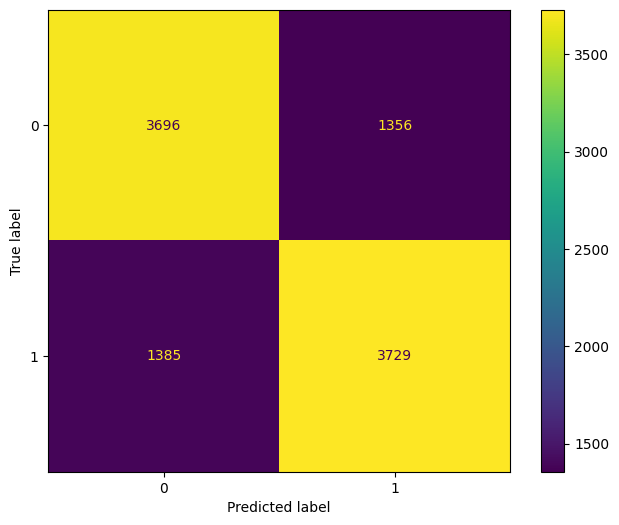


DecisionTreeClassifier_train_accuracy_iteration_8 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 8 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 8 is  0.7295888254967539
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 8 is  0.7374925629532544
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [5.839563250049184, 5.858449497703659, 11.689563754167128, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier(

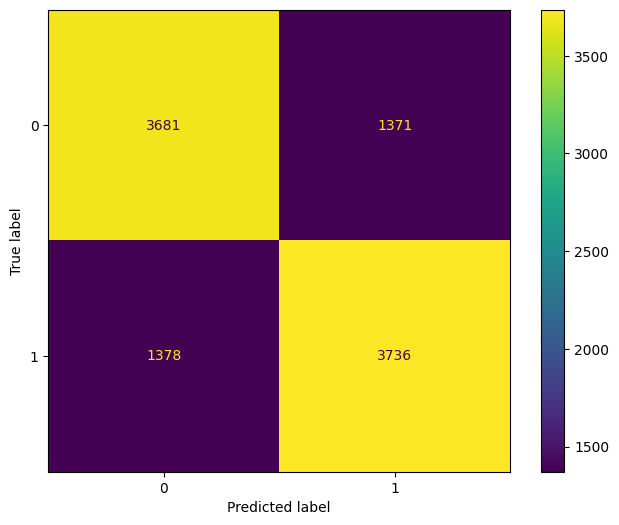


DecisionTreeClassifier_train_accuracy_iteration_9 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 9 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 9 is  0.7290969899665551
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 9 is  0.737453189015128
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [6.568660240015739, 6.589188645142063, 13.151042049043937, 0], 'KNeighborsClassifier()': [0, 0, 0, 0], 'RandomForestClassifier()

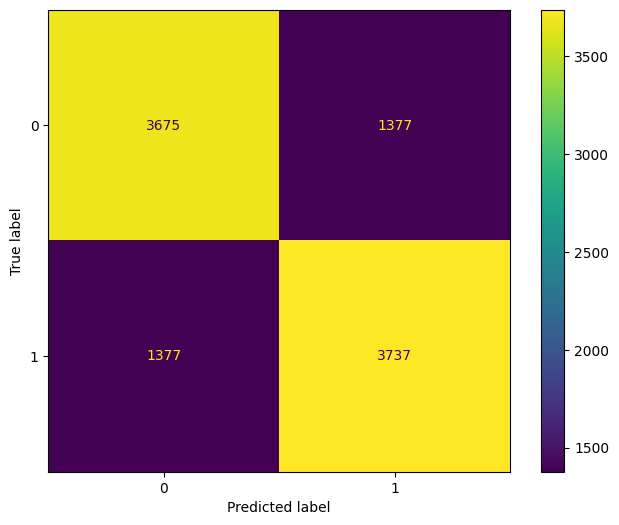


DecisionTreeClassifier_train_accuracy_iteration_10 1.0
Training accuracy of DecisionTreeClassifier() at iteration number 10 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 10 is  0.7312610662994294
Cross validation mean accuracy of DecisionTreeClassifier() at iteration number 10 is  0.7380827365583744
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5052
           1       0.73      0.73      0.73      5114

    accuracy                           0.73     10166
   macro avg       0.73      0.73      0.73     10166
weighted avg       0.73      0.73      0.73     10166

New_highest is reached at iteration number 10  
 0.7312610662994294 [0.72943038 0.73307241] [0.73000792 0.73249902]

--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [7.299

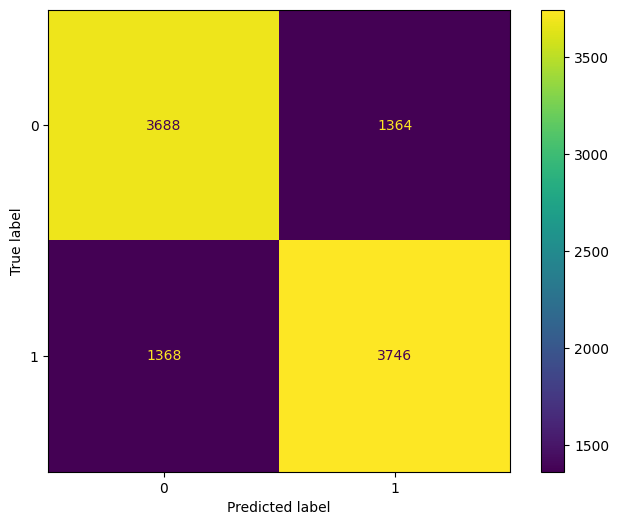

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_1 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 1 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 1 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 1 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166

New_highest is reached at iteration number 1  
 0.7779854416683061 [0.78725591 0.76947746] [0.7581156  0.79761439]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassif

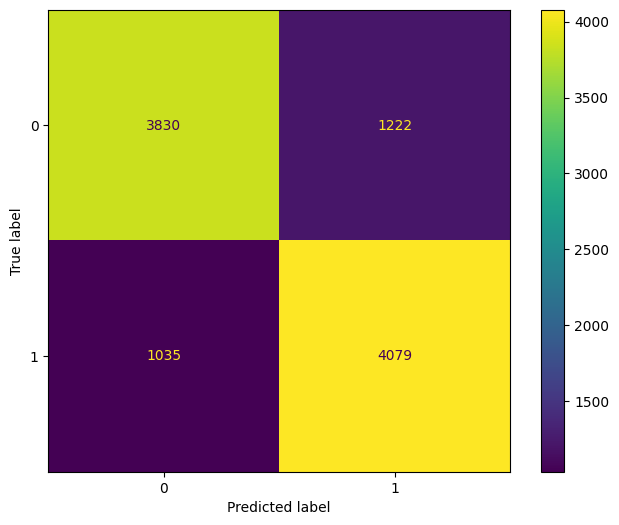

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_2 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 2 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 2 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 2 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [1.5559708833366

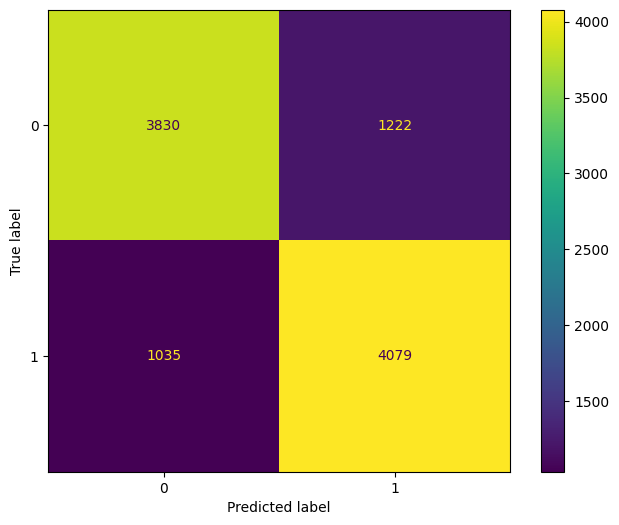

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_3 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 3 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 3 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 3 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [2.3339563250049

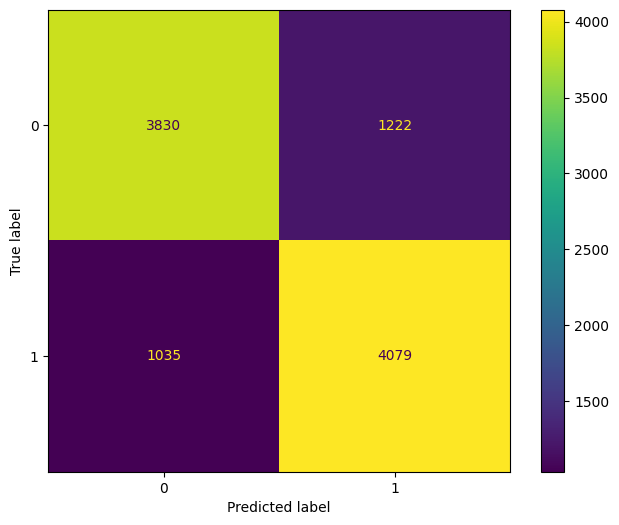

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_4 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 4 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 4 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 4 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [3.1119417666732

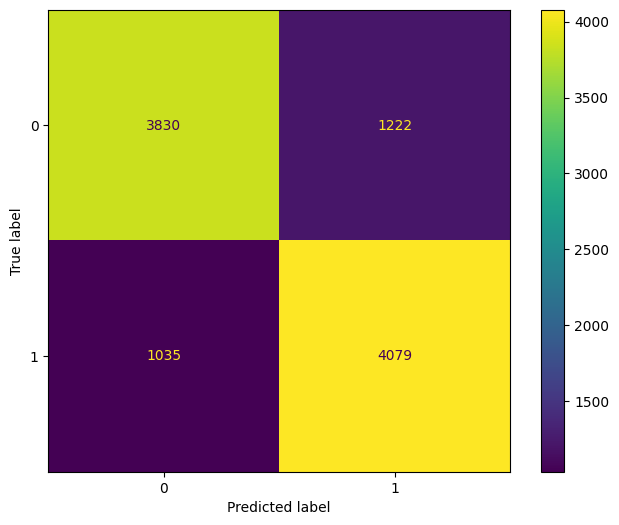

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_5 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 5 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 5 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 5 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [3.8899272083415

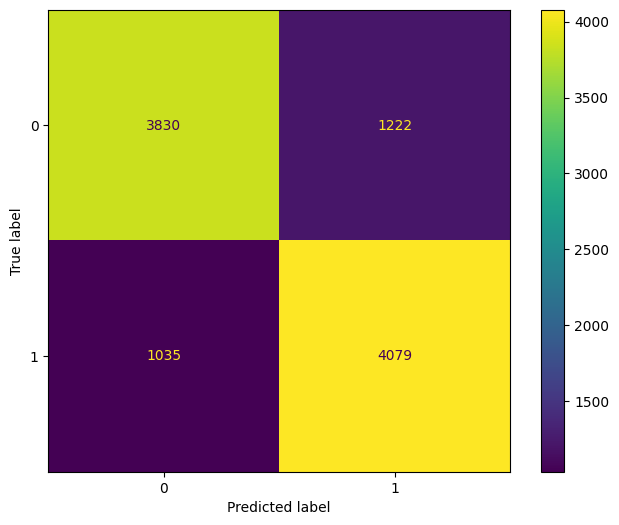

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_6 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 6 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 6 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 6 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [4.6679126500098

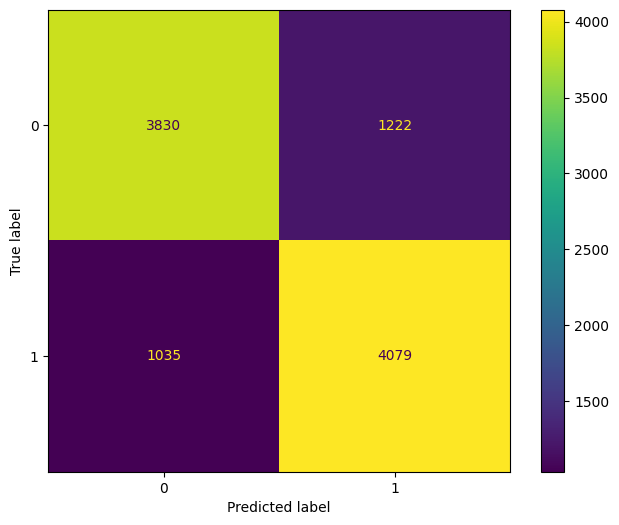

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_7 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 7 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 7 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 7 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [5.4458980916781

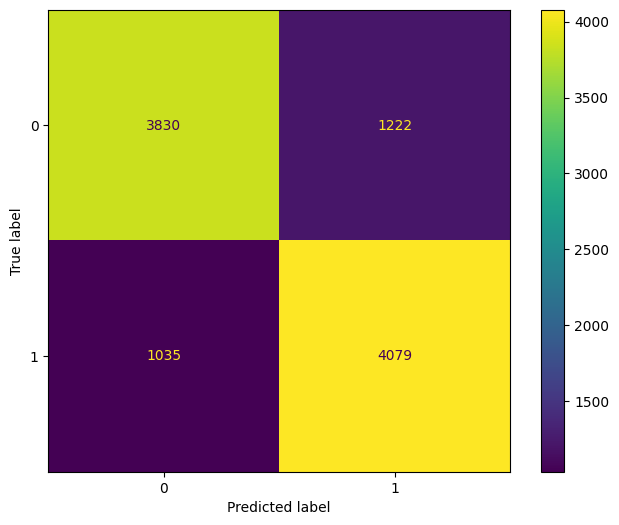

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_8 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 8 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 8 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 8 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [6.2238835333464

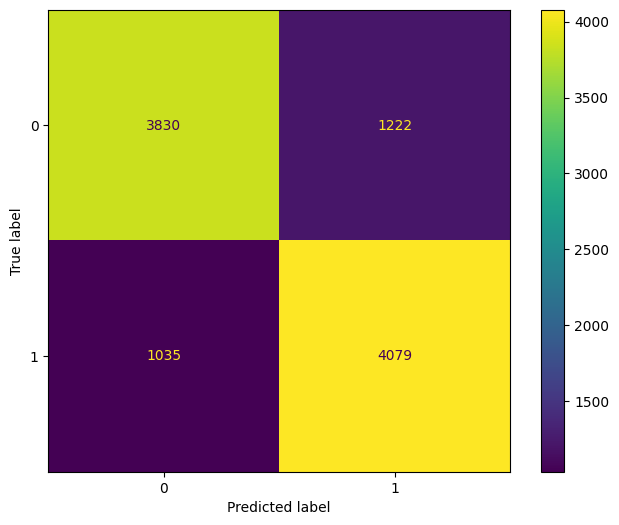

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_9 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 9 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 9 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 9 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [7.0018689750147

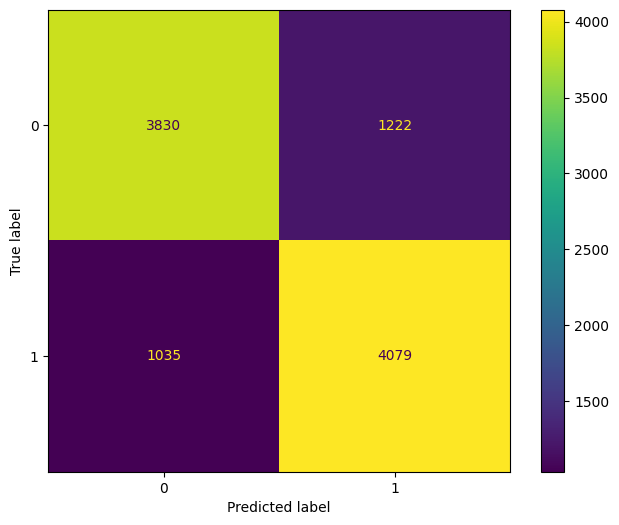

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 


KNeighborsClassifier_train_accuracy_iteration_10 0.850527506578462
Training accuracy of KNeighborsClassifier() at iteration number 10 is  0.850527506578462
Testing accuracy of KNeighborsClassifier() at iteration number 10 is  0.7779854416683061
Cross validation mean accuracy of KNeighborsClassifier() at iteration number 10 is  0.7743806573787086
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      5052
           1       0.77      0.80      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [7.77985441

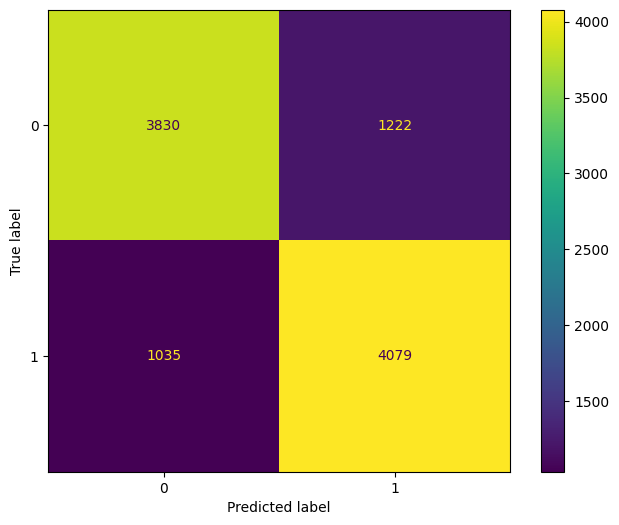

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_1 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 1 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 1 is  0.7823135943340547
Cross validation mean accuracy of RandomForestClassifier() at iteration number 1 is  0.780519039623509
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166

New_highest is reached at iteration number 1  
 0.7823135943340547 [0.78159095 0.78302439] [0.77988915 0.78470864]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTr

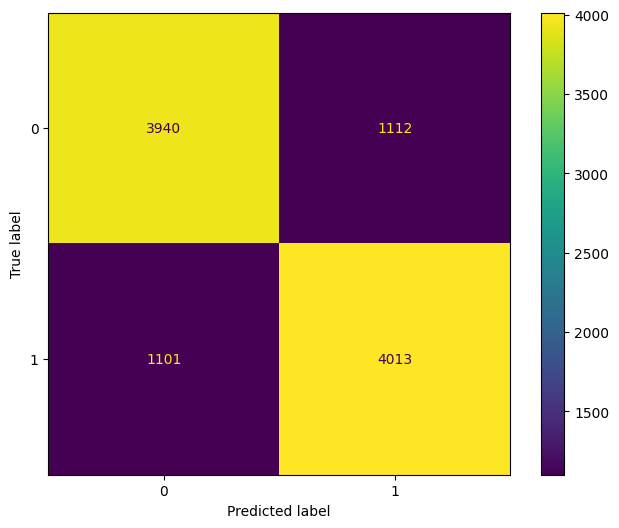

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_2 0.9999508152374394
Training accuracy of RandomForestClassifier() at iteration number 2 is  0.9999508152374394
Testing accuracy of RandomForestClassifier() at iteration number 2 is  0.7787723785166241
Cross validation mean accuracy of RandomForestClassifier() at iteration number 2 is  0.78032229573439
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.77798

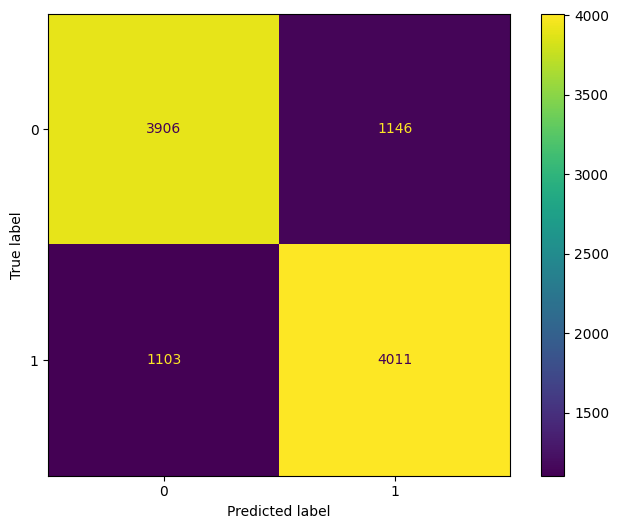

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_3 0.9999508152374394
Training accuracy of RandomForestClassifier() at iteration number 3 is  0.9999508152374394
Testing accuracy of RandomForestClassifier() at iteration number 3 is  0.779165846940783
Cross validation mean accuracy of RandomForestClassifier() at iteration number 3 is  0.7803813450291323
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779

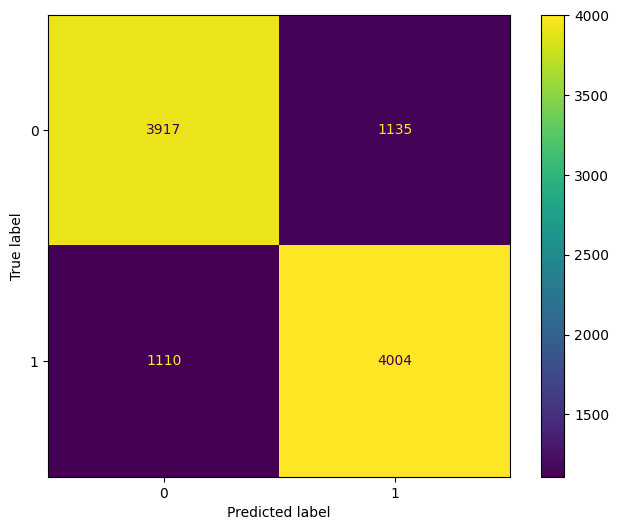

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_4 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 4 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 4 is  0.7781821758803856
Cross validation mean accuracy of RandomForestClassifier() at iteration number 4 is  0.7811092112932212
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.777

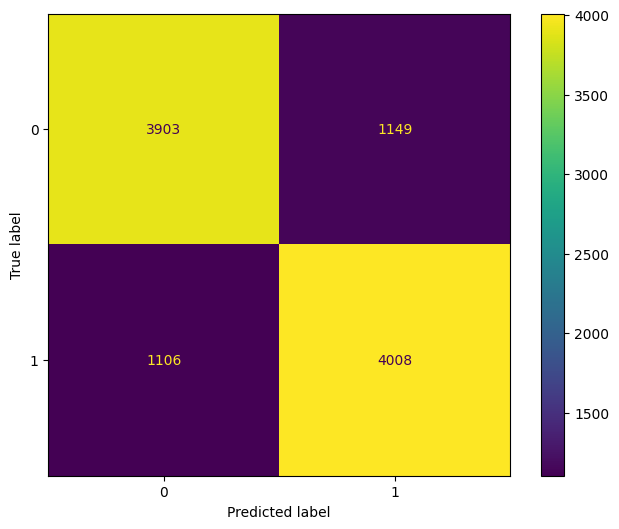

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_5 1.0
Training accuracy of RandomForestClassifier() at iteration number 5 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 5 is  0.7810348219555381
Cross validation mean accuracy of RandomForestClassifier() at iteration number 5 is  0.7812666509188978
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835

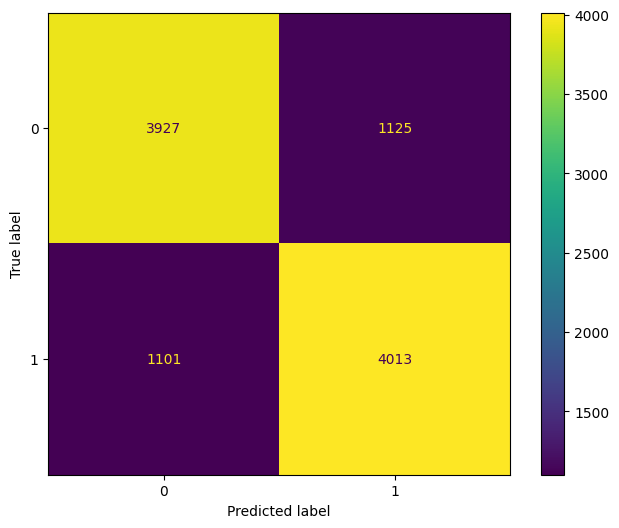

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_6 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 6 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 6 is  0.7779854416683061
Cross validation mean accuracy of RandomForestClassifier() at iteration number 6 is  0.7796140738603907
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.777

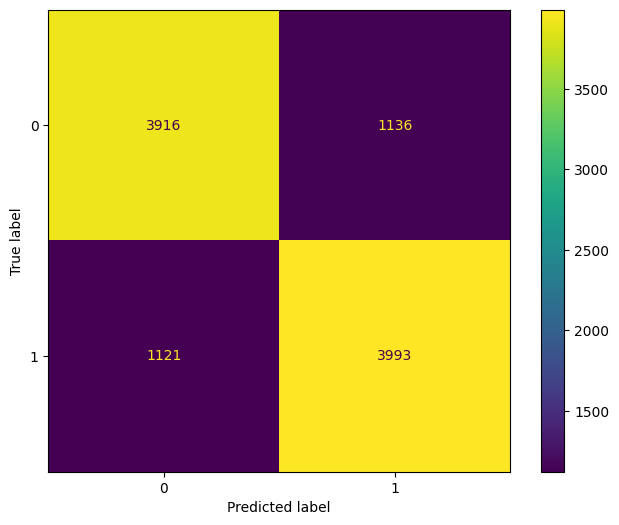

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_7 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 7 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 7 is  0.7774936061381074
Cross validation mean accuracy of RandomForestClassifier() at iteration number 7 is  0.7808338646834414
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.777

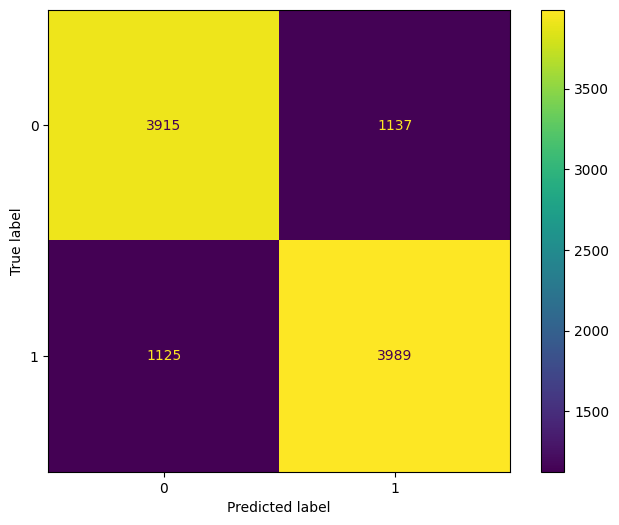

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_8 0.9999754076187197
Training accuracy of RandomForestClassifier() at iteration number 8 is  0.9999754076187197
Testing accuracy of RandomForestClassifier() at iteration number 8 is  0.7782805429864253
Cross validation mean accuracy of RandomForestClassifier() at iteration number 8 is  0.7810698392905027
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.777

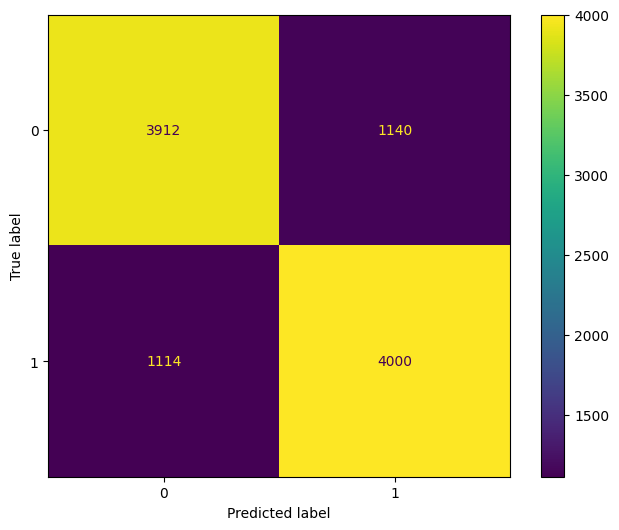

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_9 1.0
Training accuracy of RandomForestClassifier() at iteration number 9 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 9 is  0.7783789100924651
Cross validation mean accuracy of RandomForestClassifier() at iteration number 9 is  0.7795944081808143
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835

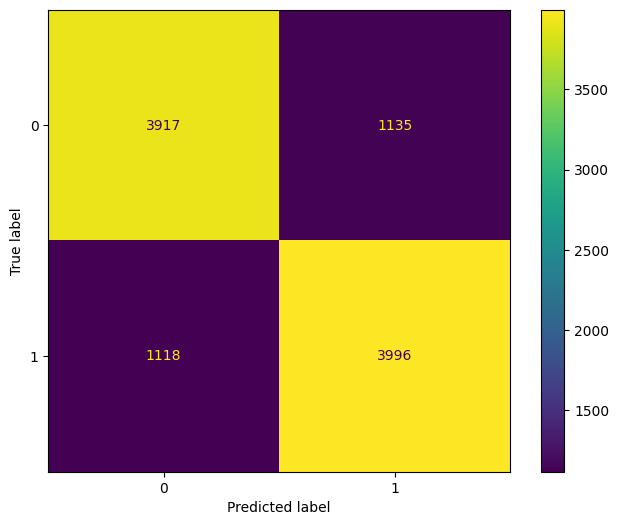

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi


RandomForestClassifier_train_accuracy_iteration_10 1.0
Training accuracy of RandomForestClassifier() at iteration number 10 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 10 is  0.7769034035018689
Cross validation mean accuracy of RandomForestClassifier() at iteration number 10 is  0.7801452059124001
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      5052
           1       0.78      0.78      0.78      5114

    accuracy                           0.78     10166
   macro avg       0.78      0.78      0.78     10166
weighted avg       0.78      0.78      0.78     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.76947745

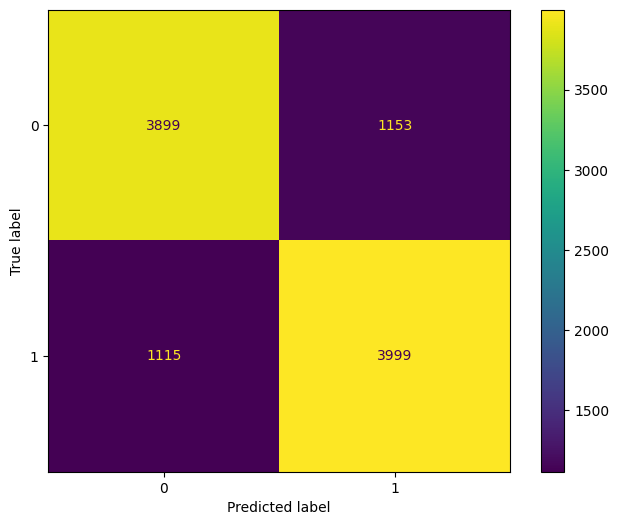

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_1 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 1 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 1 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 1 is  0.6985579333869377
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166

New_highest is reached at iteration number 1  
 0.6982097186700768 [0.71985816 0.68093385] [0.6429137  0.75283535]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.729992130631516

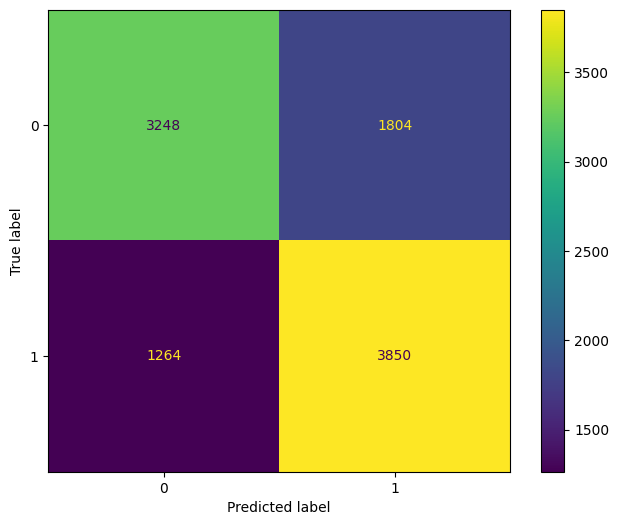

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_2 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 2 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 2 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 2 is  0.6987153284982328
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1

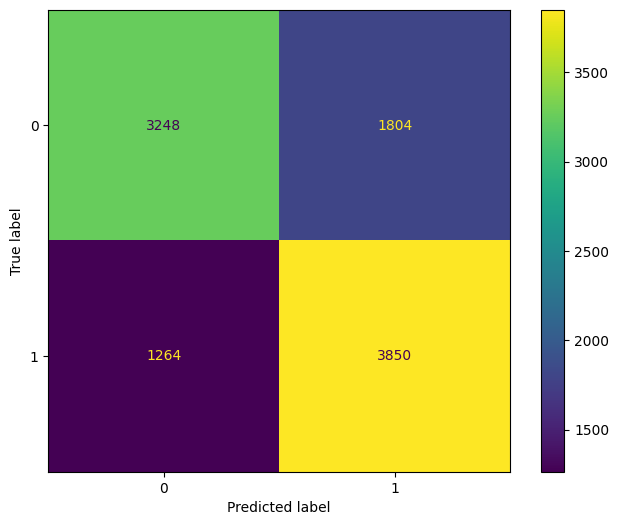

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_3 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 3 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 3 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 3 is  0.6986366270717694
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1

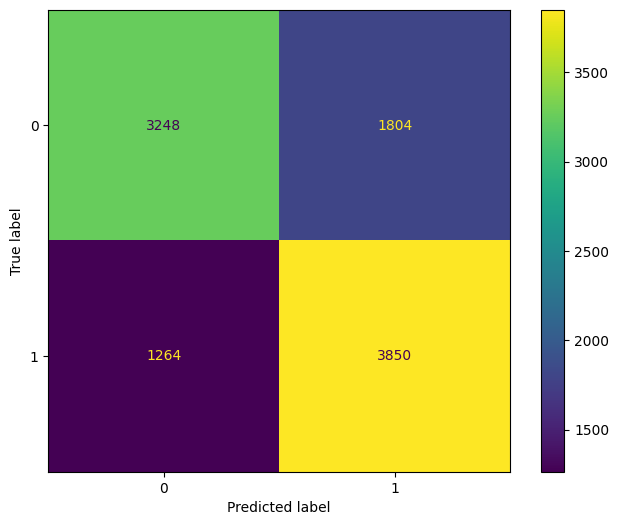

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_4 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 4 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 4 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 4 is  0.6993646210727792
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1

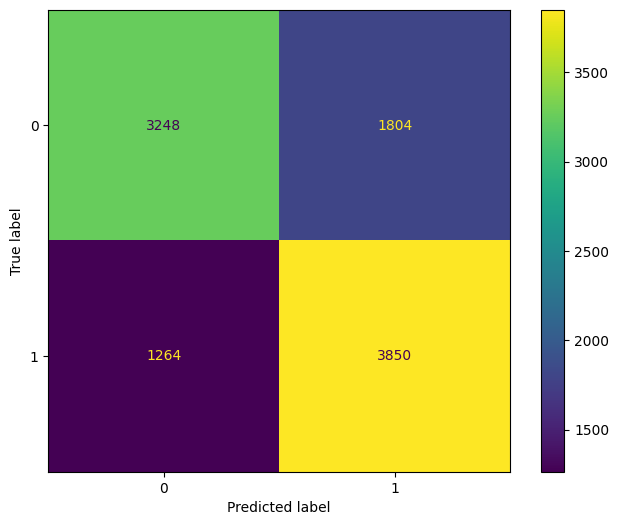

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_5 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 5 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 5 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 5 is  0.6986759835912248
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1

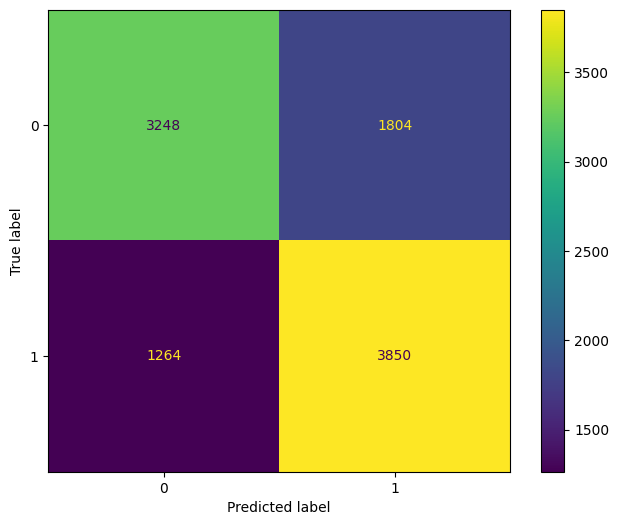

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_6 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 6 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 6 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 6 is  0.6985579333869377
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1

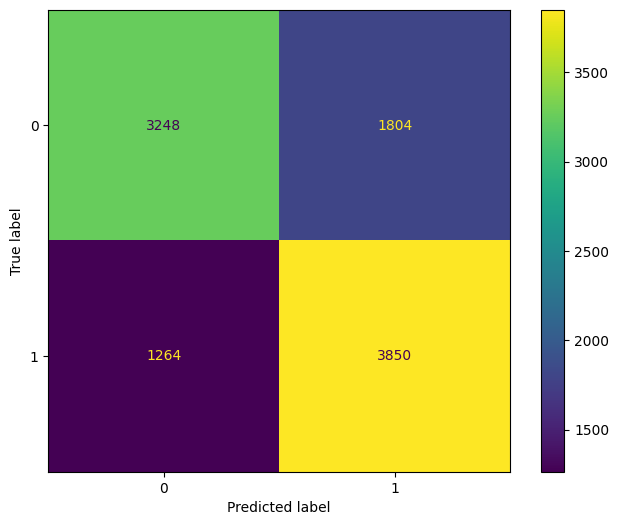

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_7 0.6989154759855397
Training accuracy of SGDClassifier() at iteration number 7 is  0.6989154759855397
Testing accuracy of SGDClassifier() at iteration number 7 is  0.6987015542002755
Cross validation mean accuracy of SGDClassifier() at iteration number 7 is  0.6984989131233139
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166

New_highest is reached at iteration number 7  
 0.6987015542002755 [0.72075472 0.68115174] [0.64271576 0.7540086 ]

--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.729992130631516

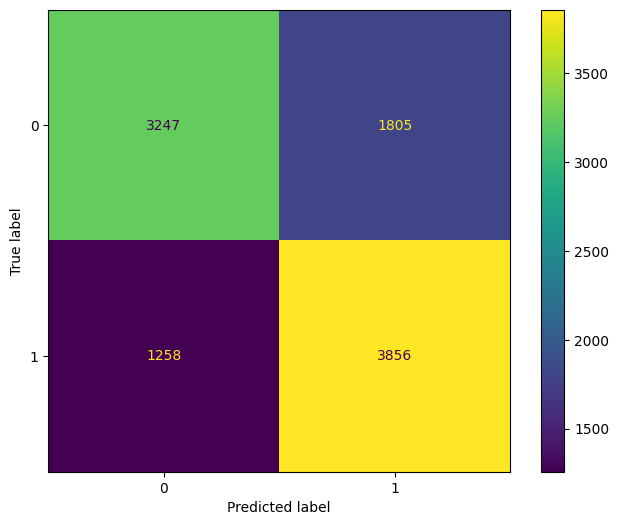

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_8 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 8 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 8 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 8 is  0.6986563082346089
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1

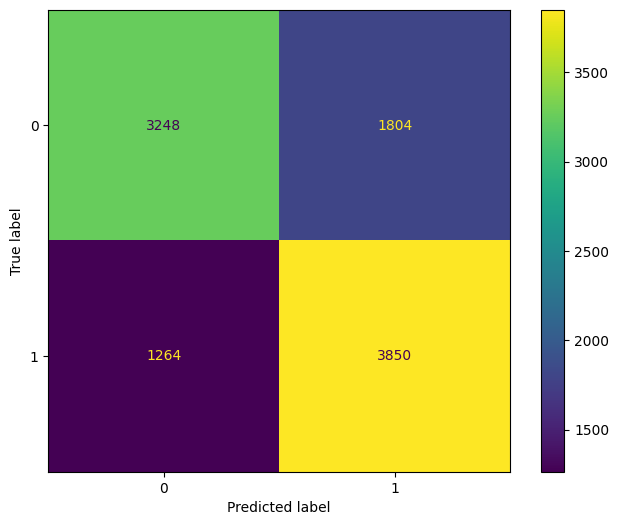

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_9 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 9 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 9 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 9 is  0.700702336298604
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.

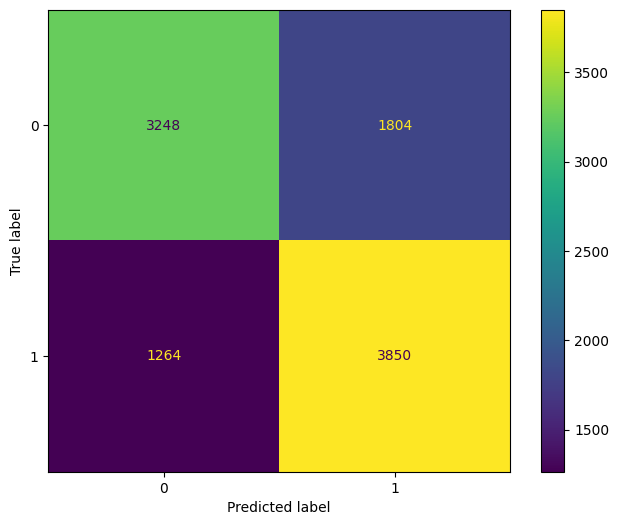

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SGDClassifier_train_accuracy_iteration_10 0.6986695521727369
Training accuracy of SGDClassifier() at iteration number 10 is  0.6986695521727369
Testing accuracy of SGDClassifier() at iteration number 10 is  0.6982097186700768
Cross validation mean accuracy of SGDClassifier() at iteration number 10 is  0.6985776068081456
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      5052
           1       0.68      0.75      0.72      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.70     10166
weighted avg       0.70      0.70      0.70     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.76947745708356

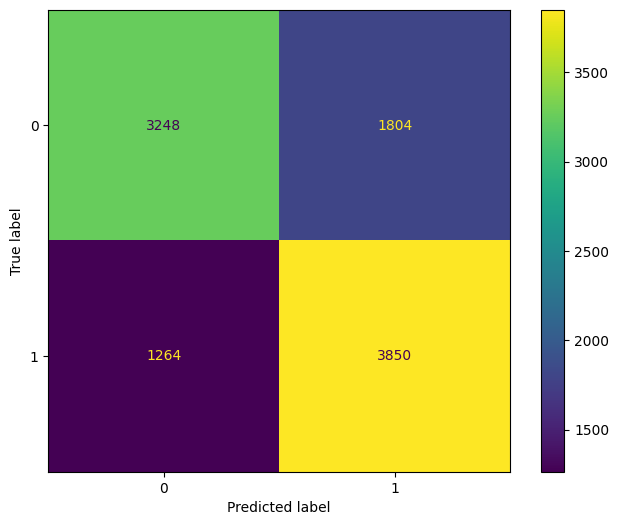

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_1 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 1 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 1 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 1 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166

New_highest is reached at iteration number 1  
 0.7126696832579186 [0.71901336 0.70684776] [0.69239905 0.73269456]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0

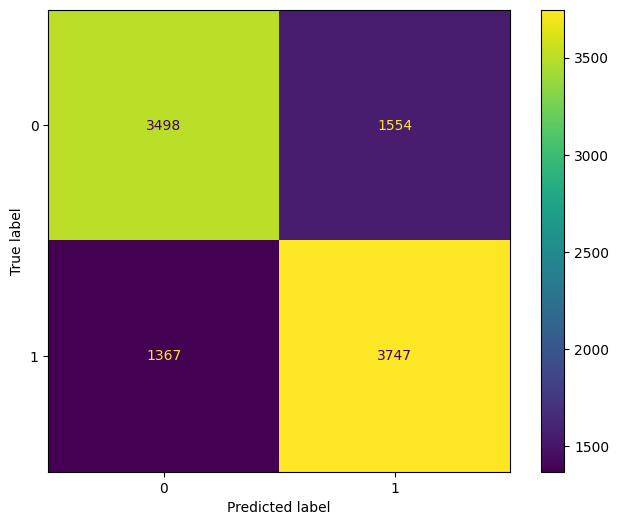

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_2 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 2 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 2 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 2 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

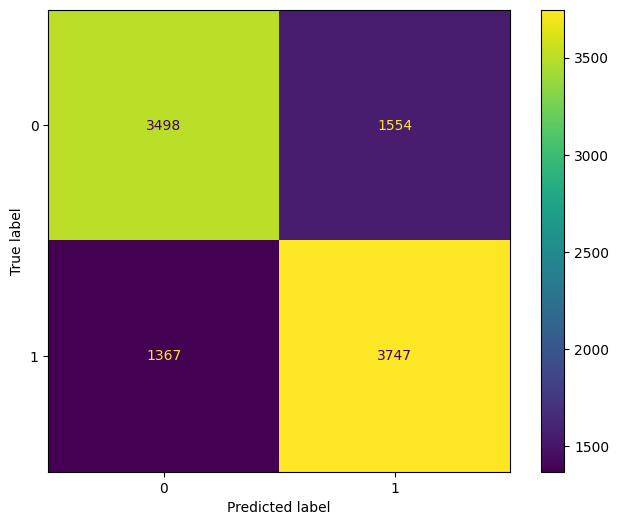

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_3 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 3 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 3 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 3 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

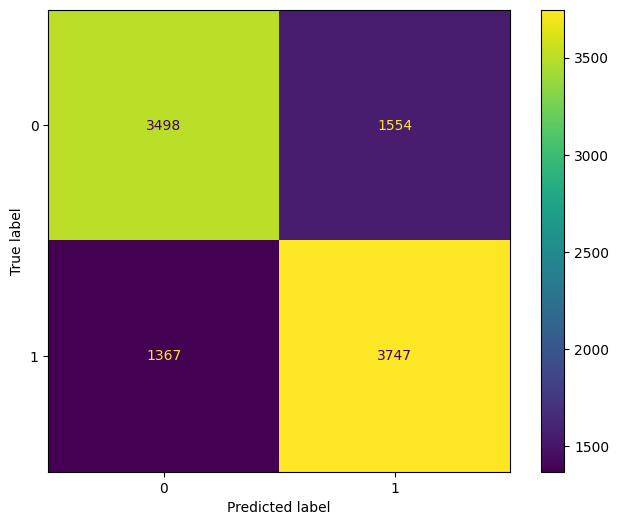

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_4 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 4 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 4 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 4 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

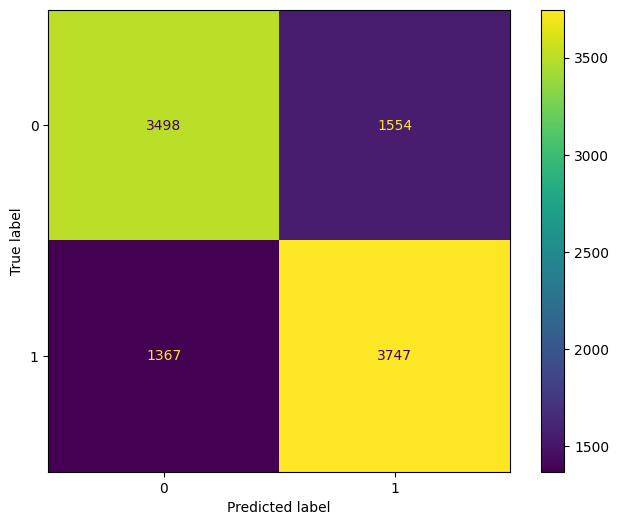

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_5 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 5 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 5 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 5 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

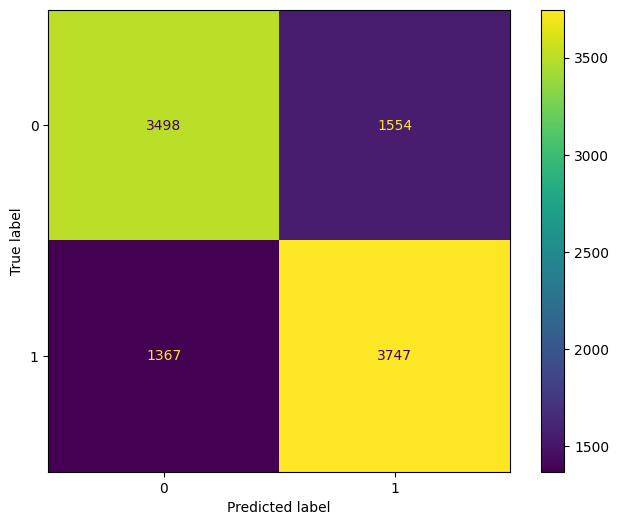

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_6 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 6 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 6 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 6 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

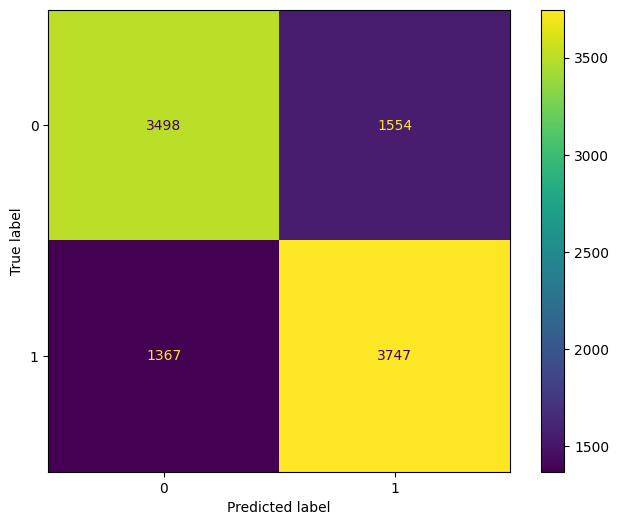

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_7 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 7 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 7 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 7 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

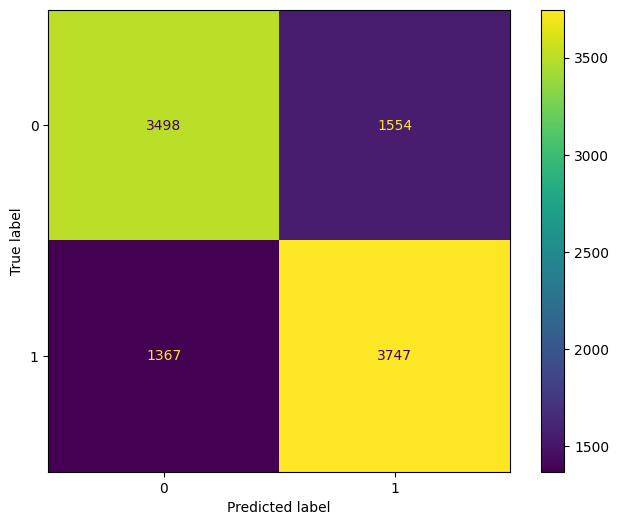

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_8 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 8 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 8 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 8 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

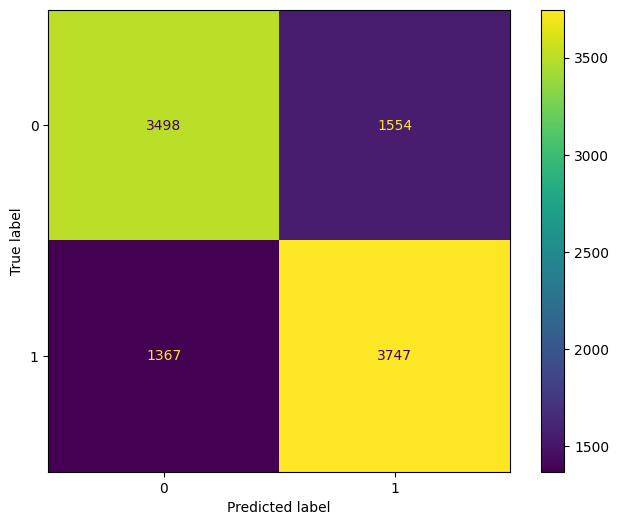

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_9 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 9 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 9 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 9 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.769

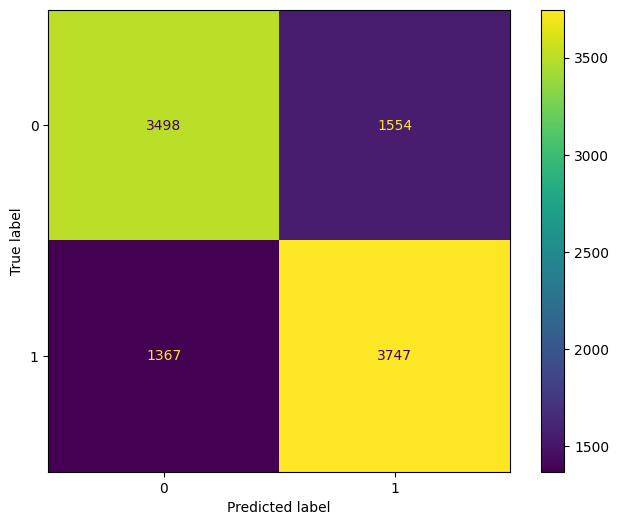

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,


RidgeClassifierCV_train_accuracy_iteration_10 0.7097115313675824
Training accuracy of RidgeClassifierCV() at iteration number 10 is  0.7097115313675824
Testing accuracy of RidgeClassifierCV() at iteration number 10 is  0.7126696832579186
Cross validation mean accuracy of RidgeClassifierCV() at iteration number 10 is  0.7105195437972645
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5052
           1       0.71      0.73      0.72      5114

    accuracy                           0.71     10166
   macro avg       0.71      0.71      0.71     10166
weighted avg       0.71      0.71      0.71     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 

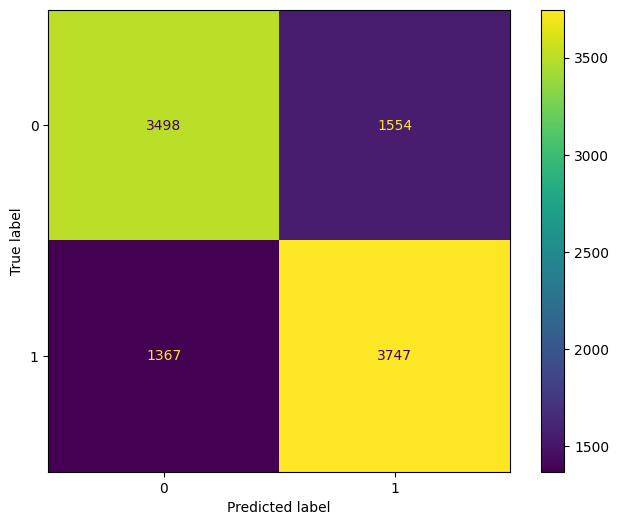

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_1 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 1 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 1 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 1 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166

New_highest is reached at iteration number 1  
 0.6955538068070037 [0.67205908 0.72538513] [0.75653207 0.63531482]

--------------------------------------------------------
At Iteration 1
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261

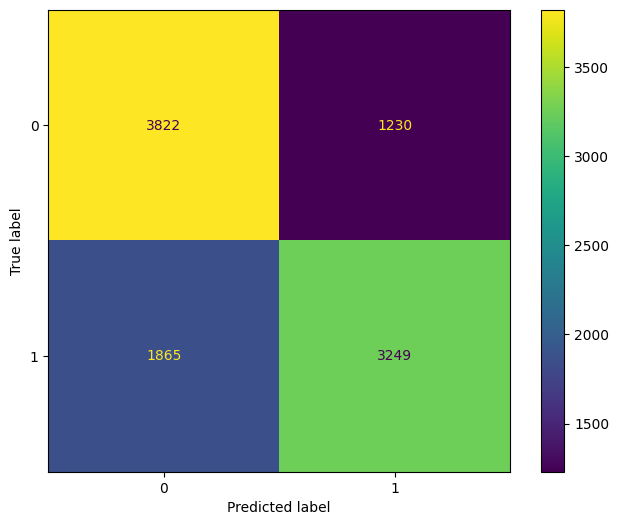

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_2 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 2 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 2 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 2 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 2
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

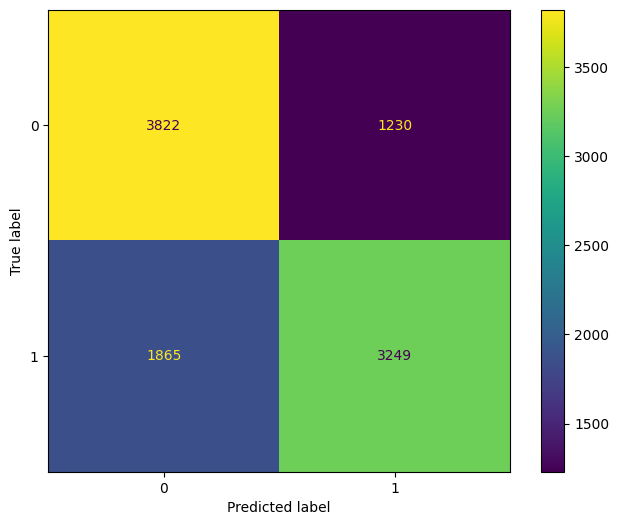

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_3 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 3 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 3 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 3 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 3
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

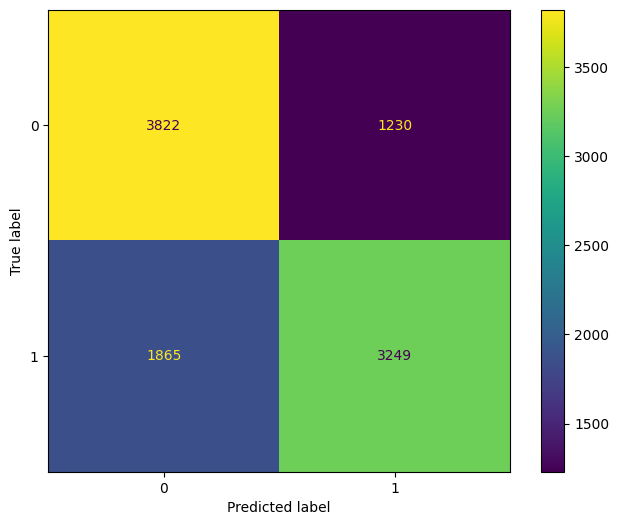

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_4 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 4 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 4 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 4 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 4
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

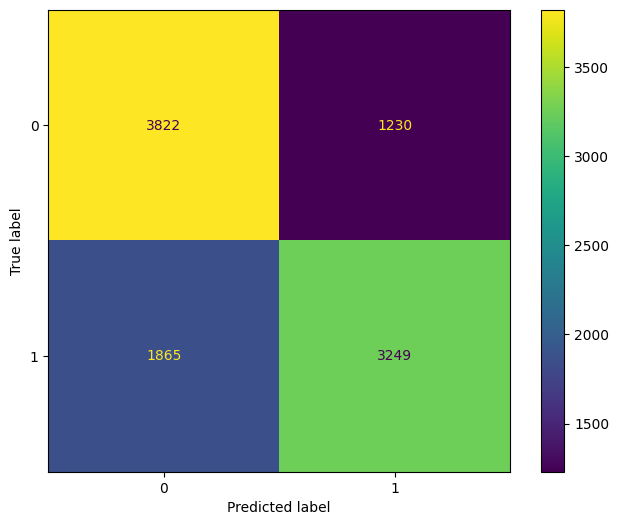

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_5 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 5 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 5 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 5 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 5
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

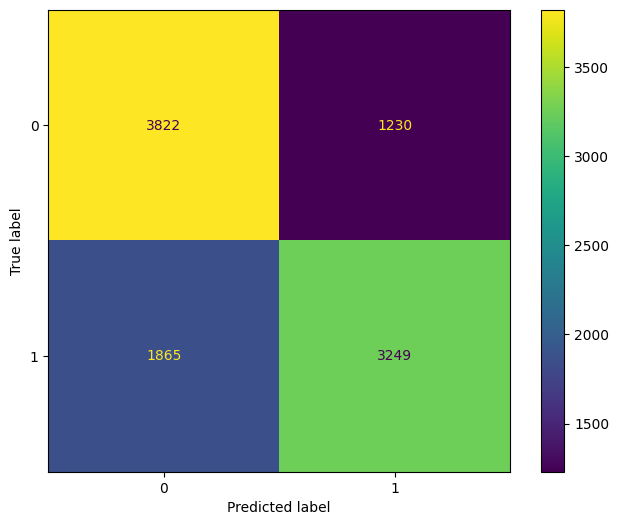

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_6 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 6 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 6 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 6 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 6
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

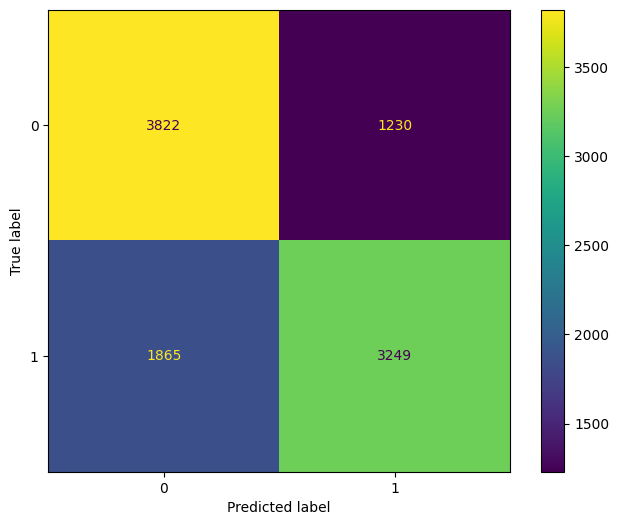

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_7 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 7 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 7 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 7 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 7
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

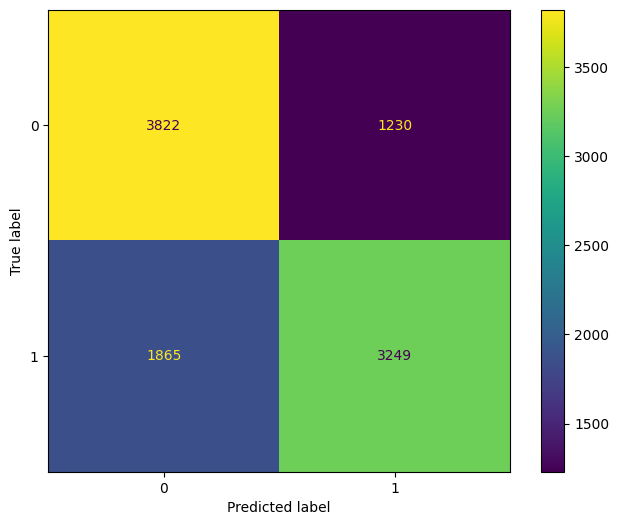

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_8 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 8 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 8 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 8 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 8
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

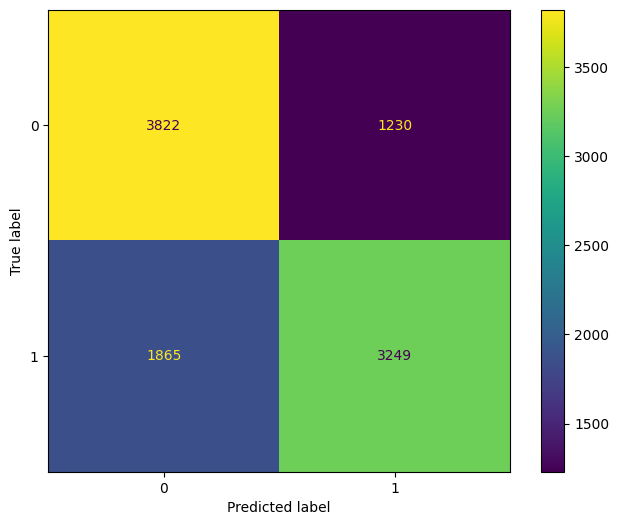

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_9 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 9 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 9 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 9 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 9
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.58090771879

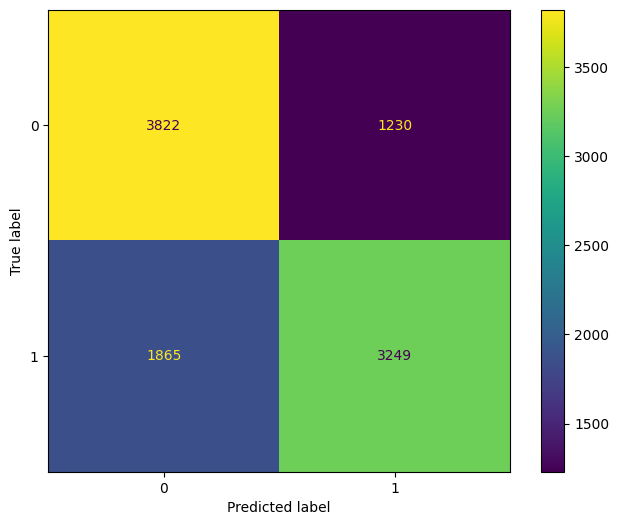

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


GaussianNB_train_accuracy_iteration_10 0.6921771635147431
Training accuracy of GaussianNB() at iteration number 10 is  0.6921771635147431
Testing accuracy of GaussianNB() at iteration number 10 is  0.6955538068070037
Cross validation mean accuracy of GaussianNB() at iteration number 10 is  0.6928328149182015
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      5052
           1       0.73      0.64      0.68      5114

    accuracy                           0.70     10166
   macro avg       0.70      0.70      0.69     10166
weighted avg       0.70      0.70      0.69     10166


--------------------------------------------------------
At Iteration 10
defaultdict(<class 'list'>, {'LogisticRegression()': [0.7114892779854418, 0.7079916078580965, 1.4426604932120415, 0.0], 'DecisionTreeClassifier()': [0.7299921306315168, 0.7322261052187073, 1.46163266738396, 0.0], 'KNeighborsClassifier()': [0.7779854416683062, 0.7694774570835693, 1.580907

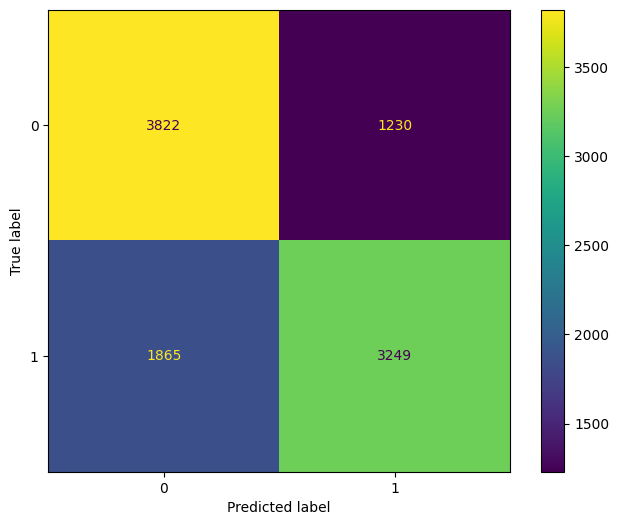

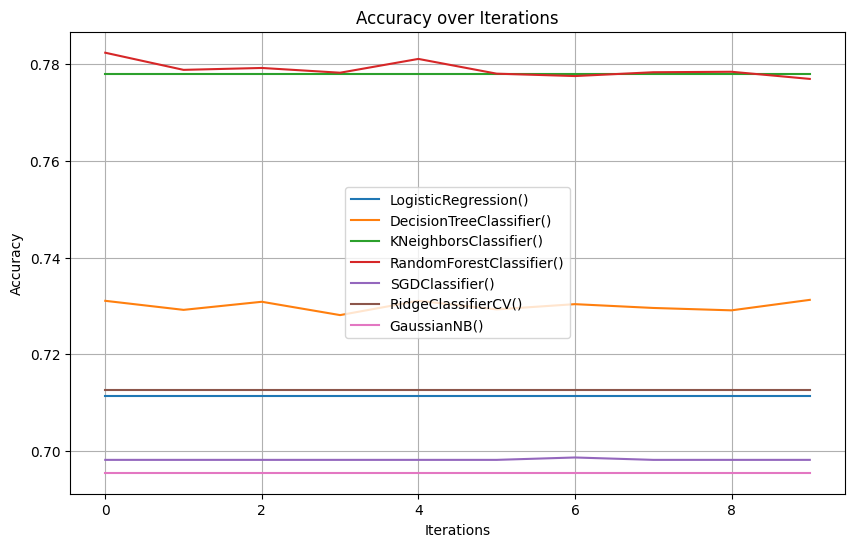

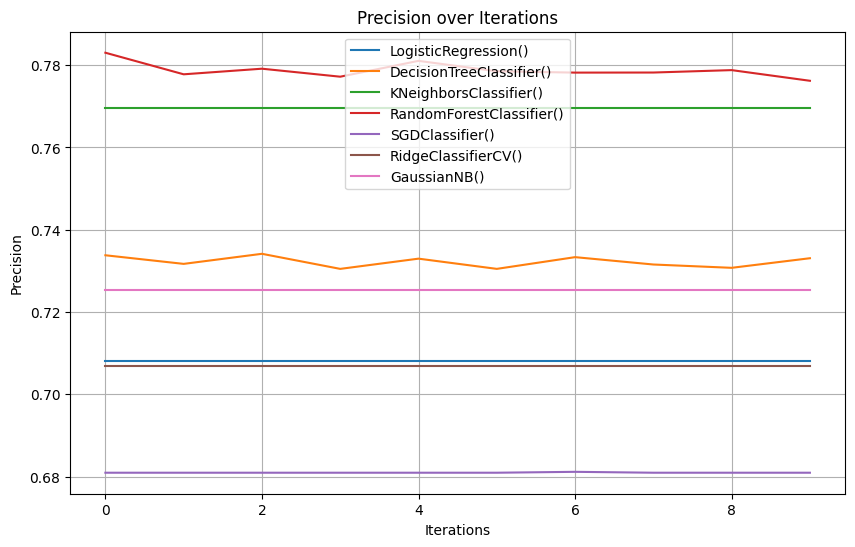

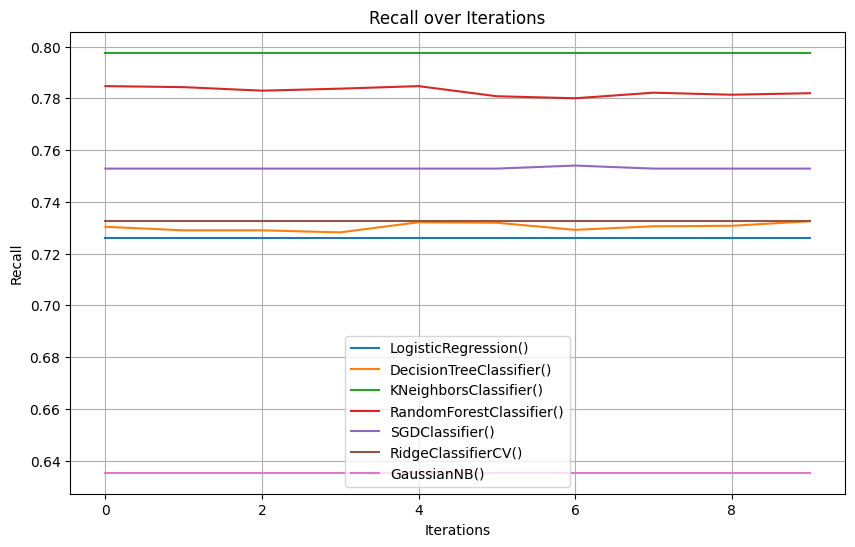

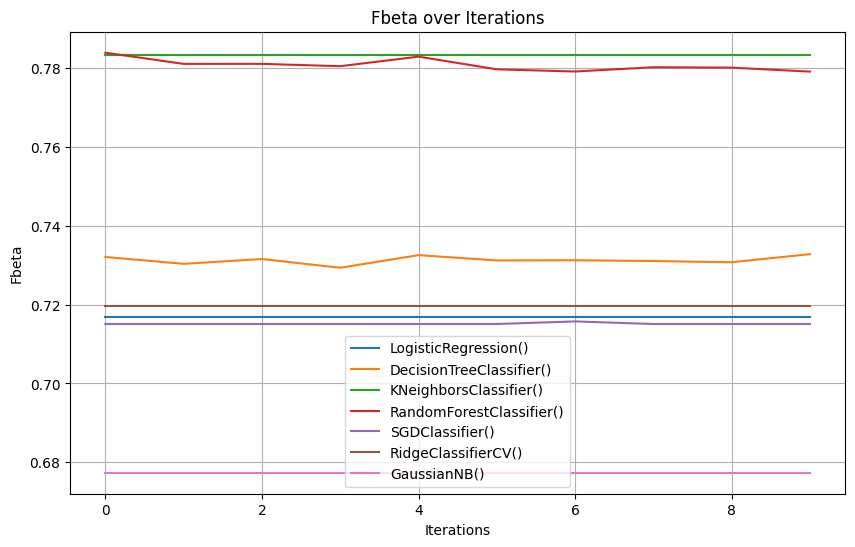

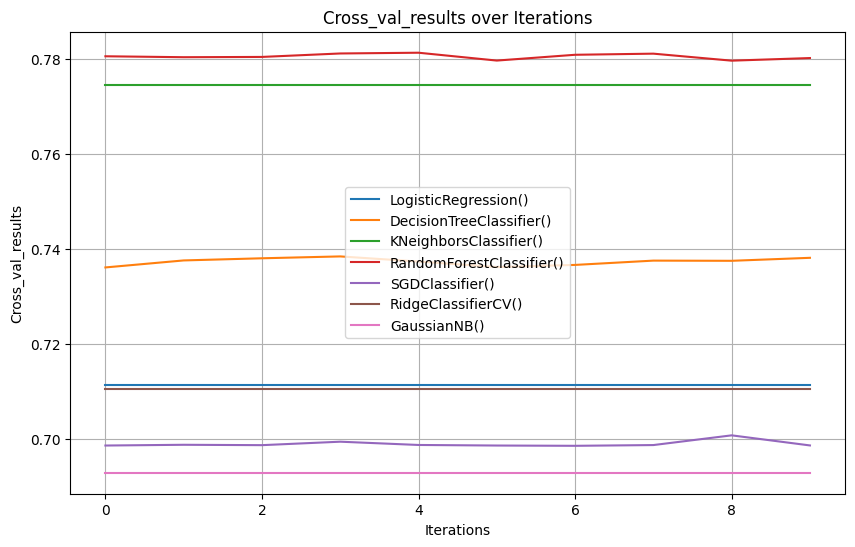

In [86]:
n_iter=10
# Perform algorithm testing and log metrics
with mlflow.start_run(run_name="logging_metrics2_mode", experiment_id=mlflow.get_experiment_by_name('PATH3').experiment_id) as run:
    for algo in algorithms_to_be_tested:
        for i in range(n_iter):
            algo_testing(algo=algo, test_size=0.2, X=X, Y=Y, evaluation_metric="accuracy_score", random_state=42, shuffle=True, iteration_number=i+1)

        
        # Calculate average metrics
        avg_accuracies[algo][0]/=n_iter
        avg_accuracies[algo][1]/=n_iter
        avg_accuracies[algo][2]/=n_iter
        avg_accuracies[algo][3]/=n_iter


    def plot_metrics(metrics_history, metric_name):
        fig_roc=plt.figure(figsize=(10, 6))
        for algo in algorithms_to_be_tested:
            plt.plot(metrics_history[algo][metric_name], label=algo)
        plt.xlabel('Iterations')
        plt.ylabel(metric_name.capitalize())
        plt.title(f'{metric_name.capitalize()} over Iterations')
        plt.legend()
        plt.grid(True)
        plt.savefig(f"{metric_name}_plot.png")
        plt.show()
        mlflow.log_figure(fig_roc, f"metrics/{metric_name}.png")
    
        # mlflow.log_artifact(f"{metric_name}_plot.png")
    
    # Generate and log plots for each metric
    for metric in ['accuracy', 'precision', 'recall', 'fbeta','cross_val_results']:
        plot_metrics(metrics_history, metric)
mlflow.end_run()